In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
import imageio
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output

print(check_output(["ls", "../data/kaggle"]).decode("utf8"))

RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [3]:
response = pd.read_csv('../data/kaggle/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [4]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('The total number of respondents:', response.shape[0])
print('Total number of Countries with respondents:', response['Country'].nunique())
print('Country with highest respondents:', response['Country'].value_counts().index[0], 'with',
      response['Country'].value_counts().values[0], 'respondents')
print('Youngest respondent:', response['Age'].min(), ' and Oldest respondent:', response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


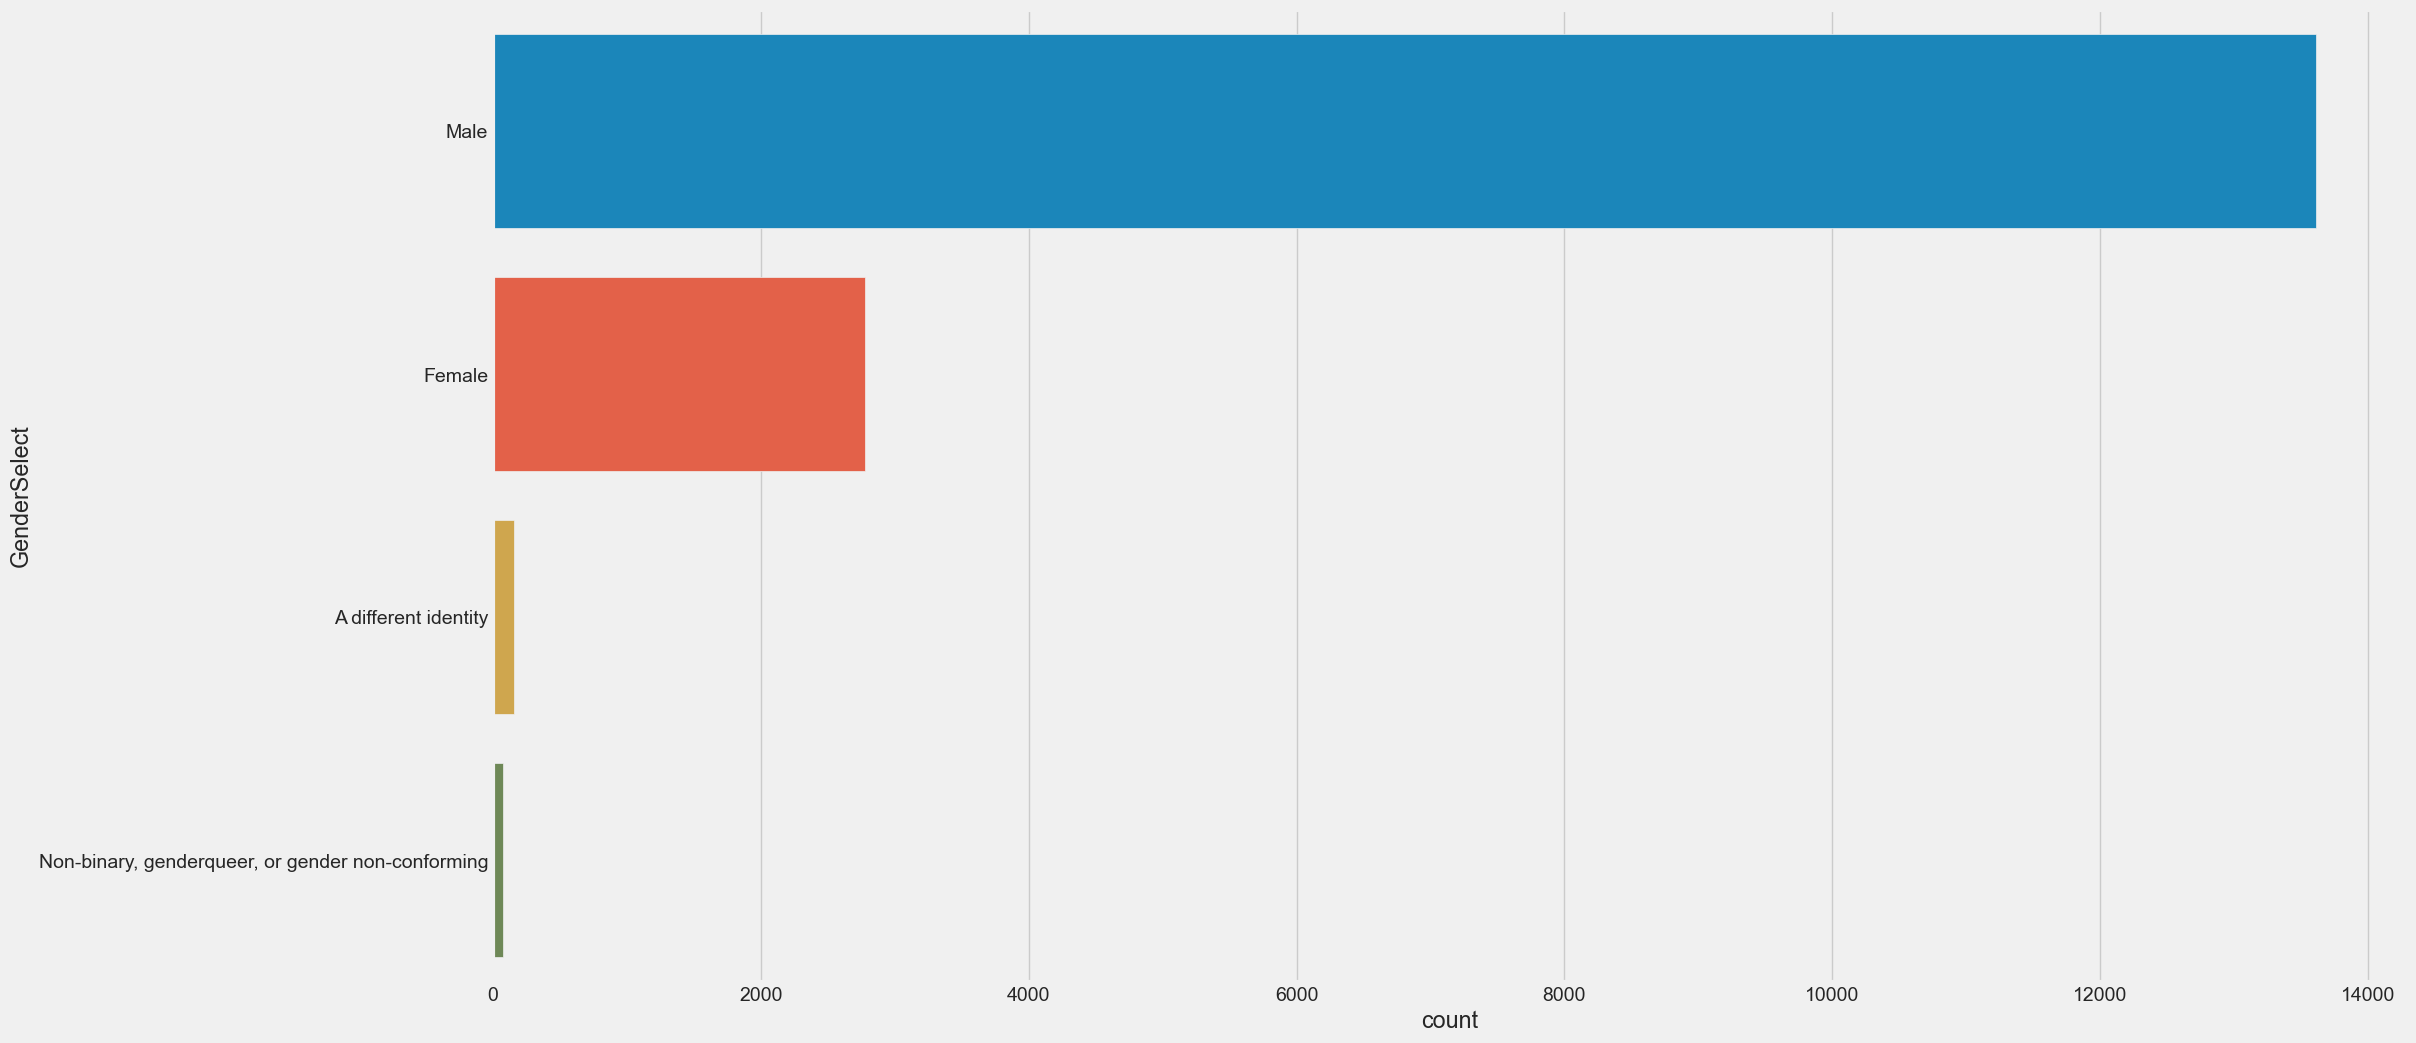

In [6]:
plt.subplots(figsize=(22, 12))
sns.countplot(y=response['GenderSelect'], order=response['GenderSelect'].value_counts().index)
plt.show()

In [7]:
resp_coun = response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()
tree = response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values, label=tree.index, color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size': 20})
fig = plt.gcf()
fig.set_size_inches(40, 15)
plt.show()

KeyError: 'Country'

In [9]:
response['CompensationAmount'] = response['CompensationAmount'].str.replace(',', '')
response['CompensationAmount'] = response['CompensationAmount'].str.replace('-', '')
rates = pd.read_csv('../data/kaggle/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
salary = response[
    ['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


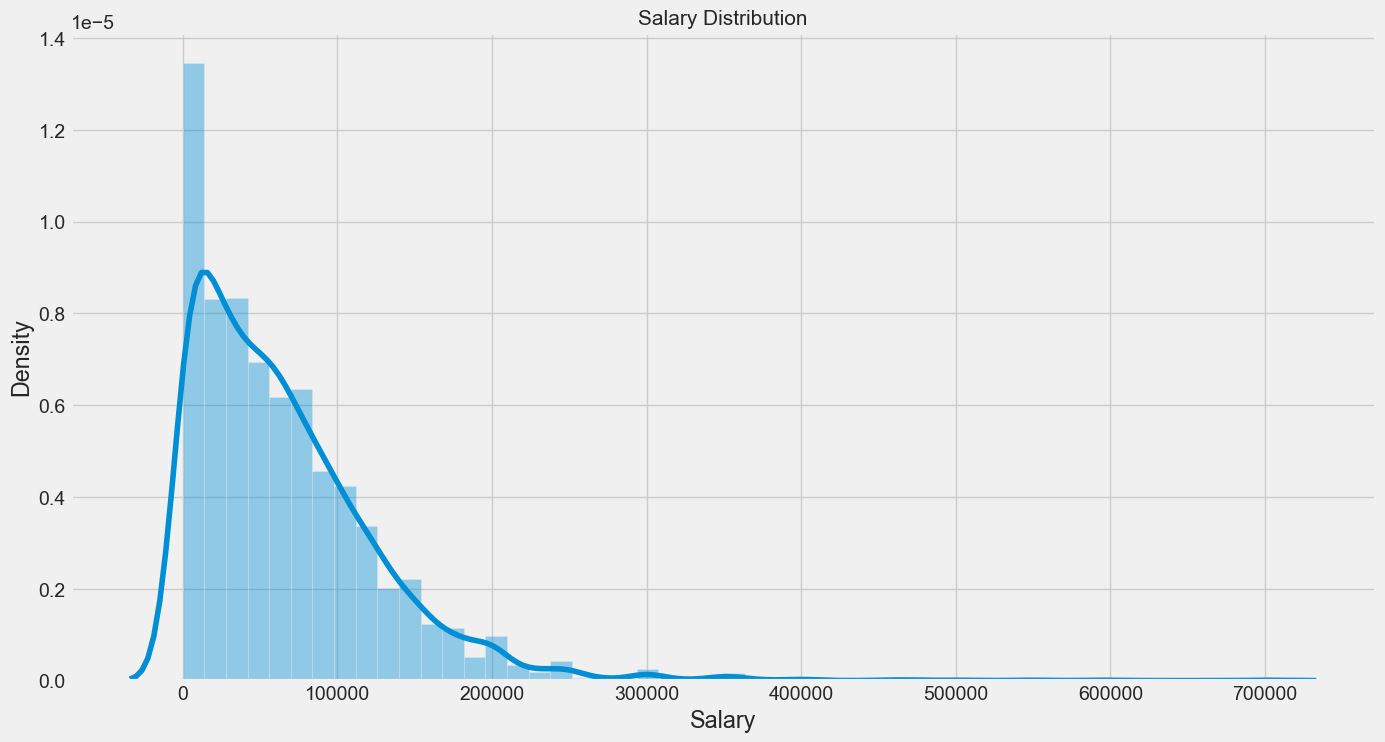

In [10]:
plt.subplots(figsize=(15, 8))
salary = salary[salary['Salary'] < 1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution', size=15)
plt.show()

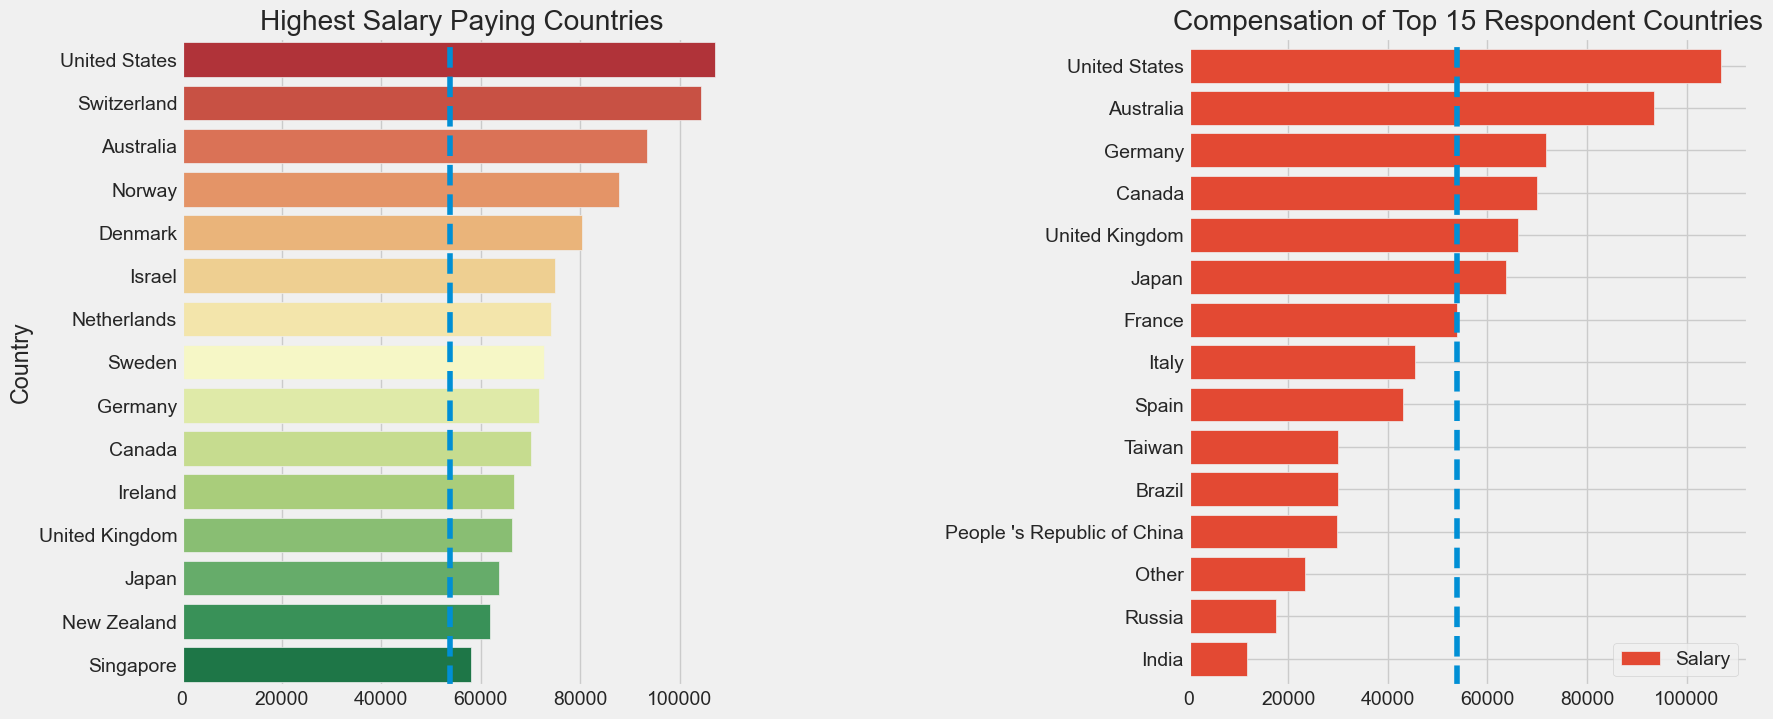

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot(x='Salary', y=sal_coun.index, data=sal_coun, palette='RdYlGn', ax=ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary', ascending=True).plot.barh(width=0.8, ax=ax[1], color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(), linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

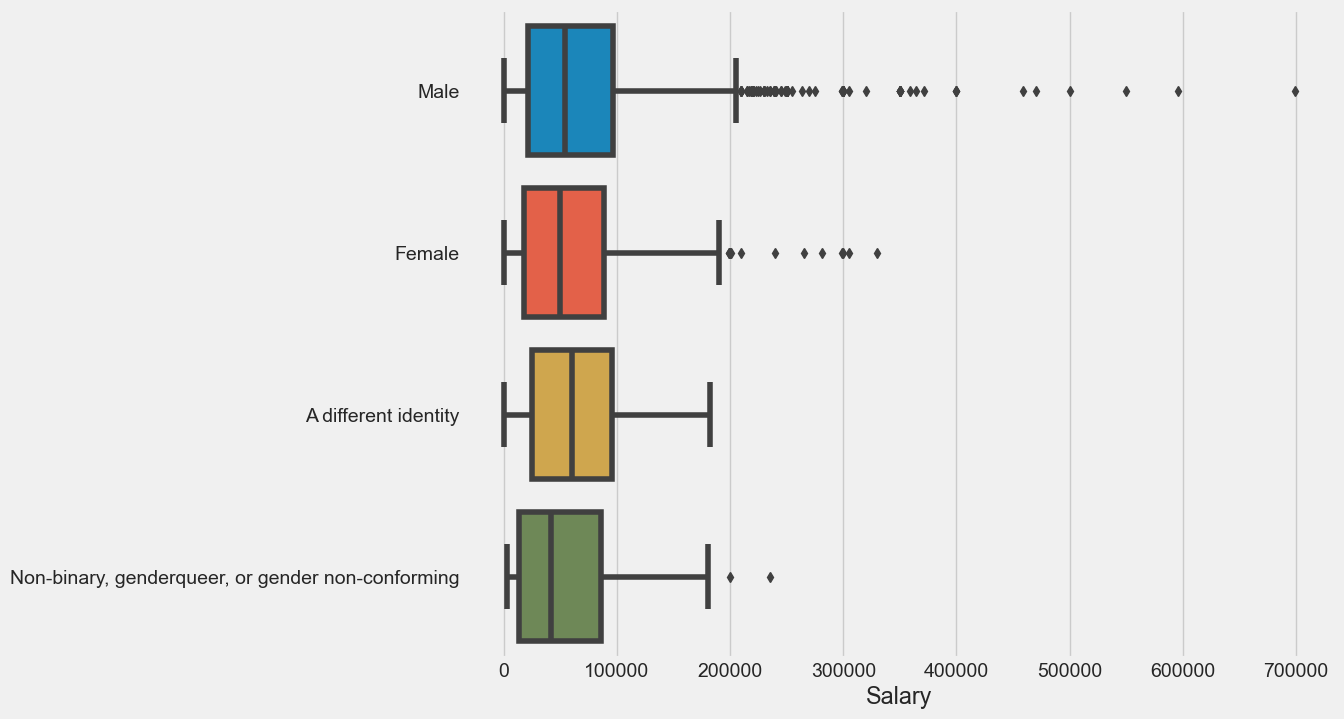

In [13]:
plt.subplots(figsize=(10, 8))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

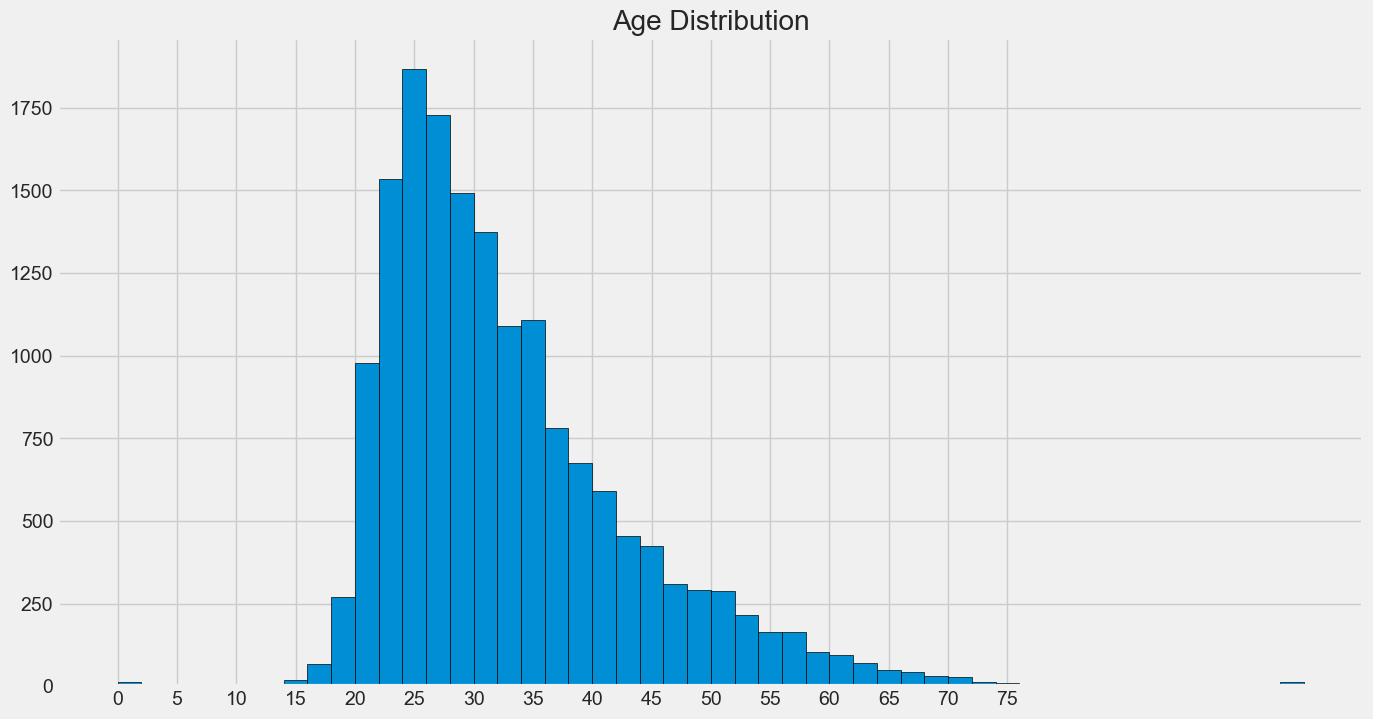

In [14]:
plt.subplots(figsize=(15, 8))
response['Age'].hist(bins=50, edgecolor='black')
plt.xticks(list(range(0, 80, 5)))
plt.title('Age Distribution')
plt.show()

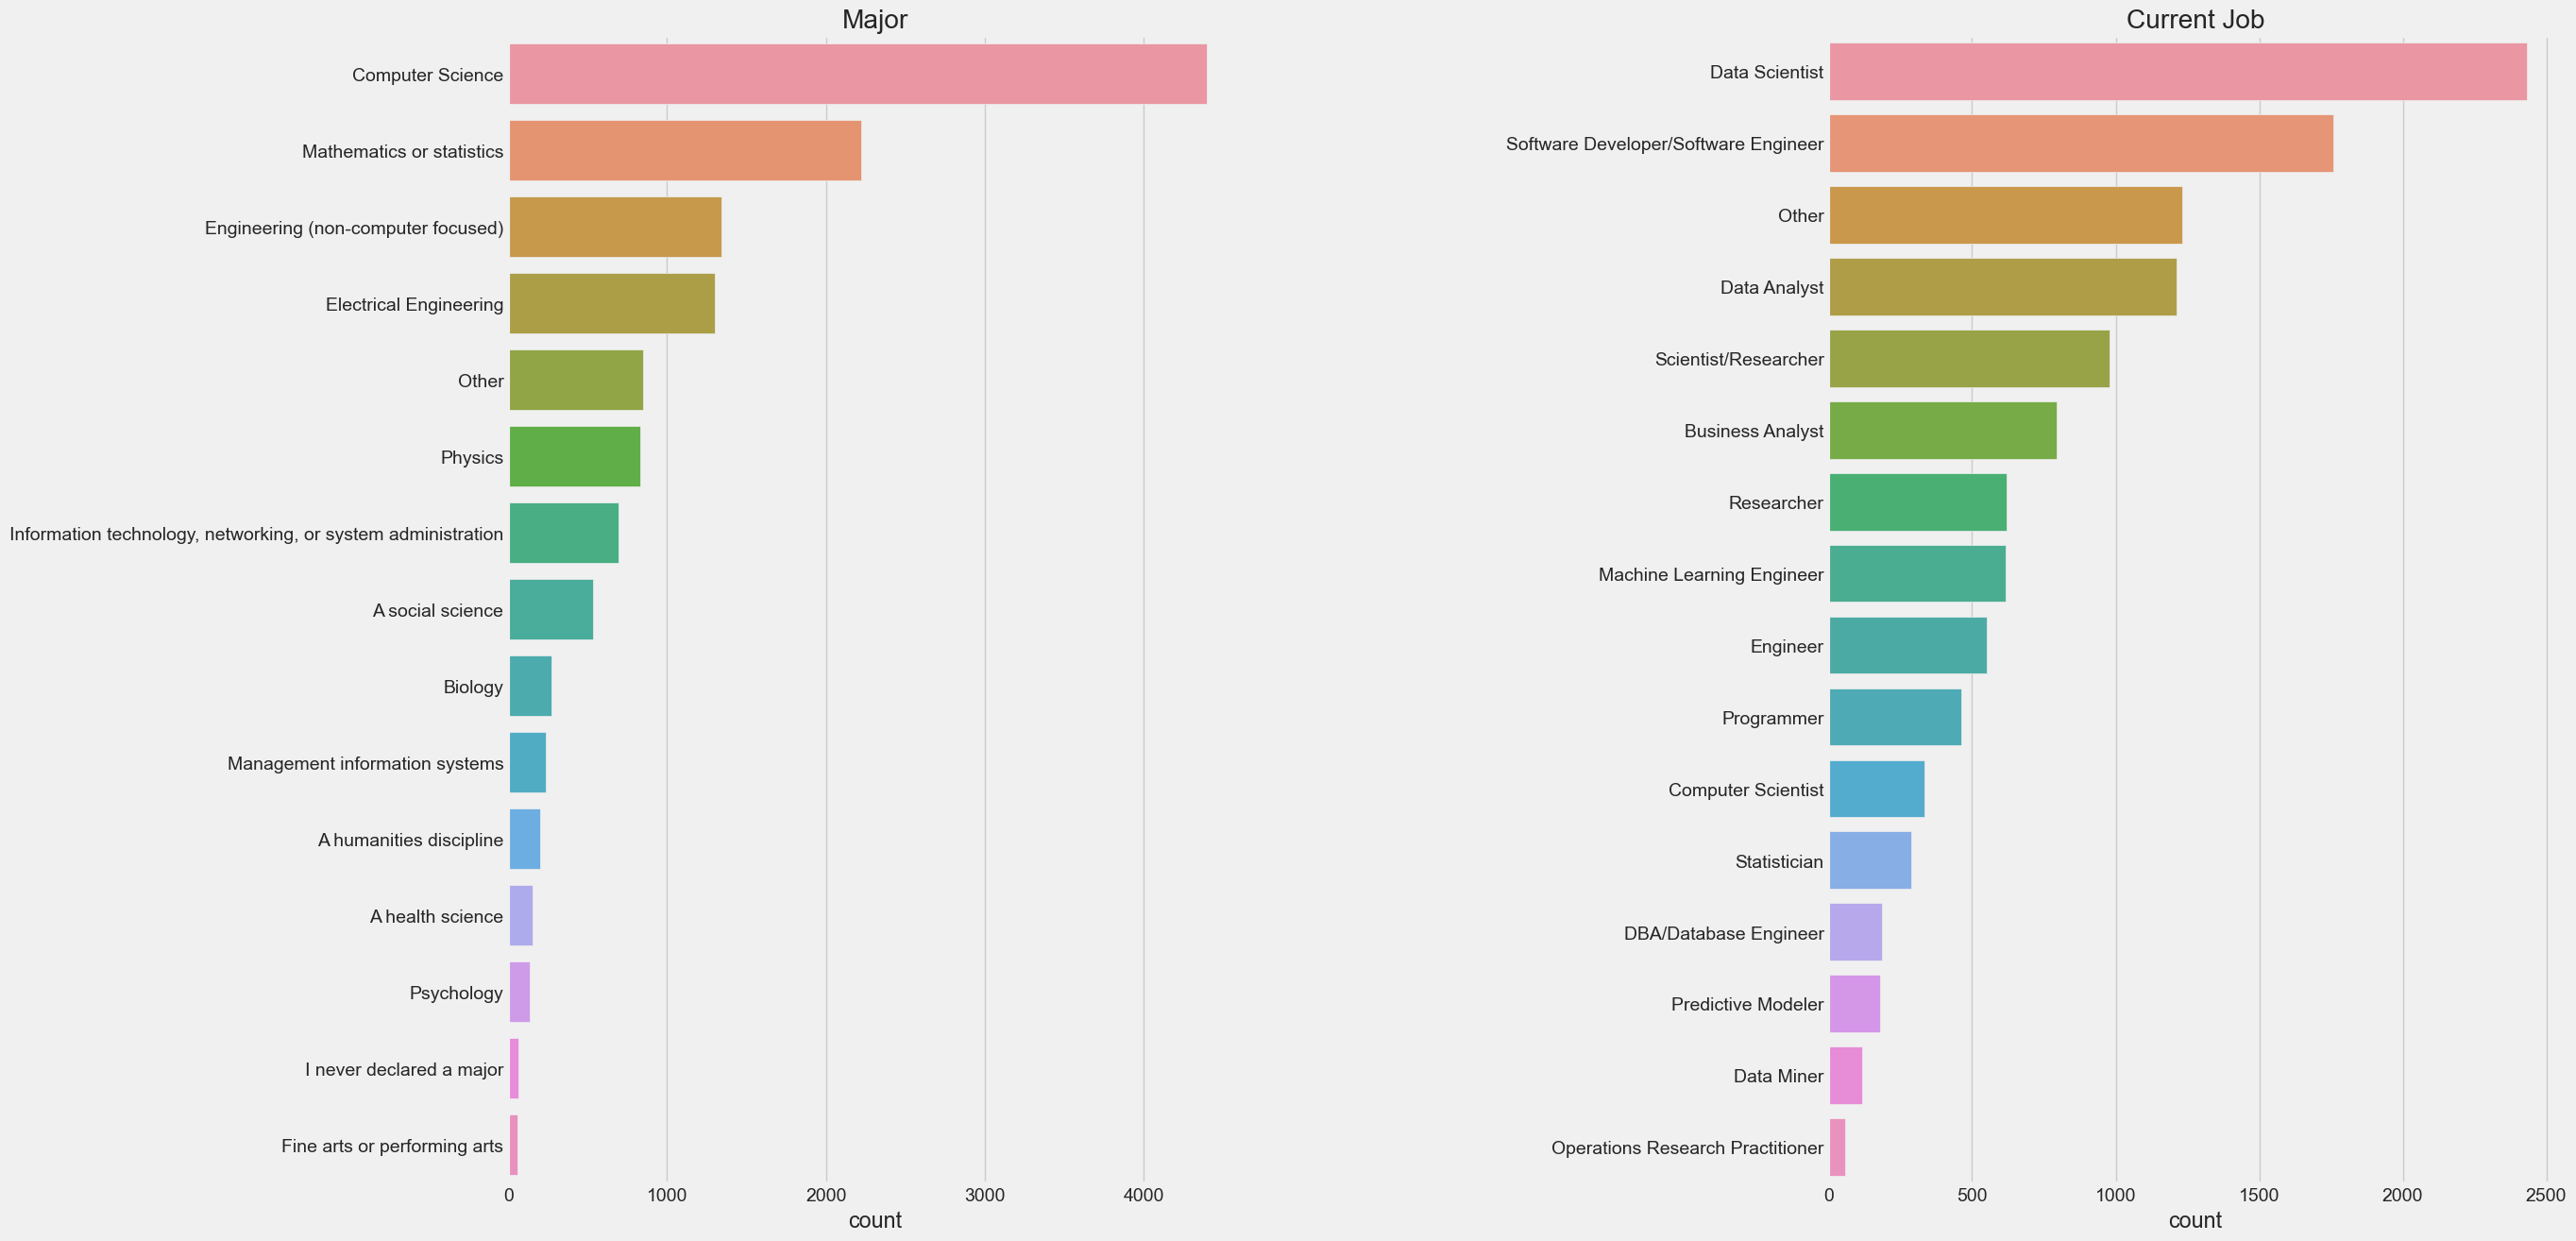

In [15]:
f, ax = plt.subplots(1, 2, figsize=(25, 15))
sns.countplot(y=response['MajorSelect'], ax=ax[0], order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'], ax=ax[1],
              order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

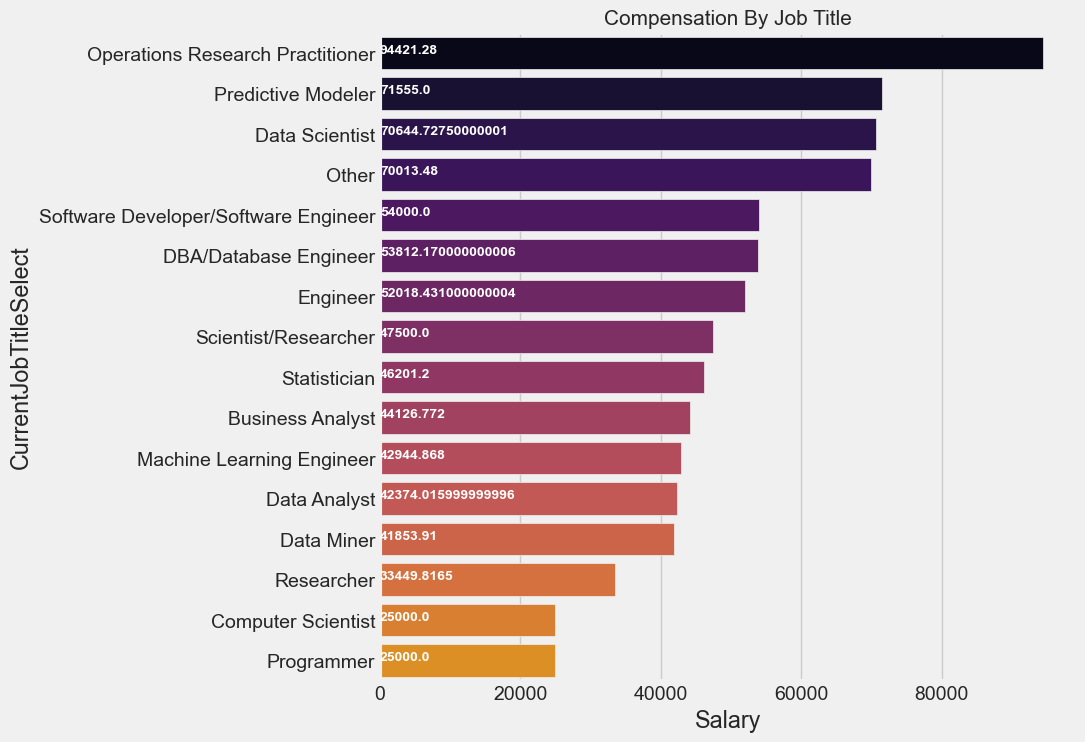

In [17]:
sal_job = salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',
                                                                                            ascending=False)
ax = sns.barplot(x=sal_job.Salary, y=sal_job.index, palette=sns.color_palette('inferno', 20))
plt.title('Compensation By Job Title', size=15)
for i, v in enumerate(sal_job.Salary):
    ax.text(.5, i, v, fontsize=10, color='white', weight='bold')
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

KeyError: 0

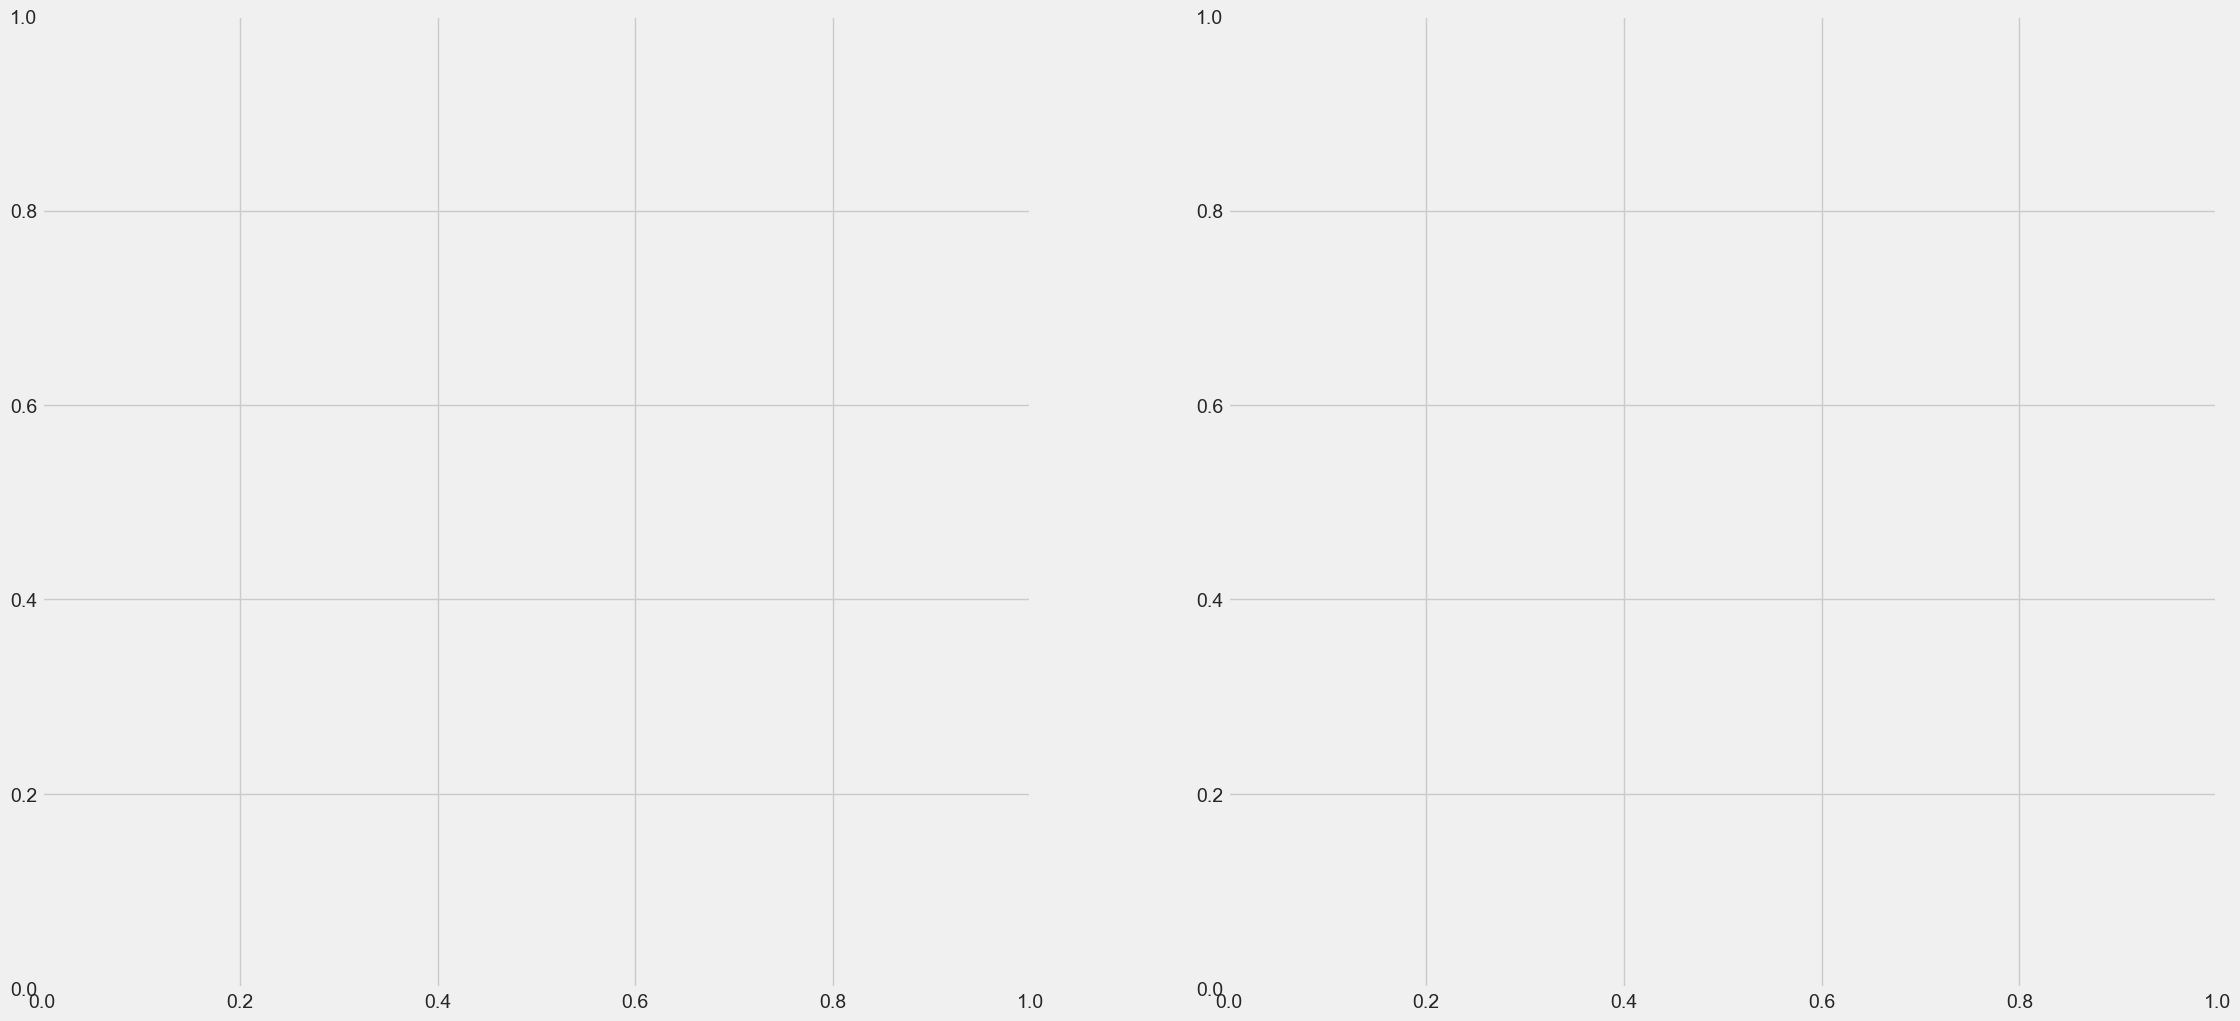

In [20]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
skills = response['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)
plt1 = pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[0], palette=sns.color_palette('inferno_r', 15))
ax[0].set_title('ML Skills')
tech = response['MLTechniquesSelect'].str.split(',')
techniques = []
for i in tech.dropna():
    techniques.extend(i)
plt1 = pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[1], palette=sns.color_palette('inferno_r', 15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

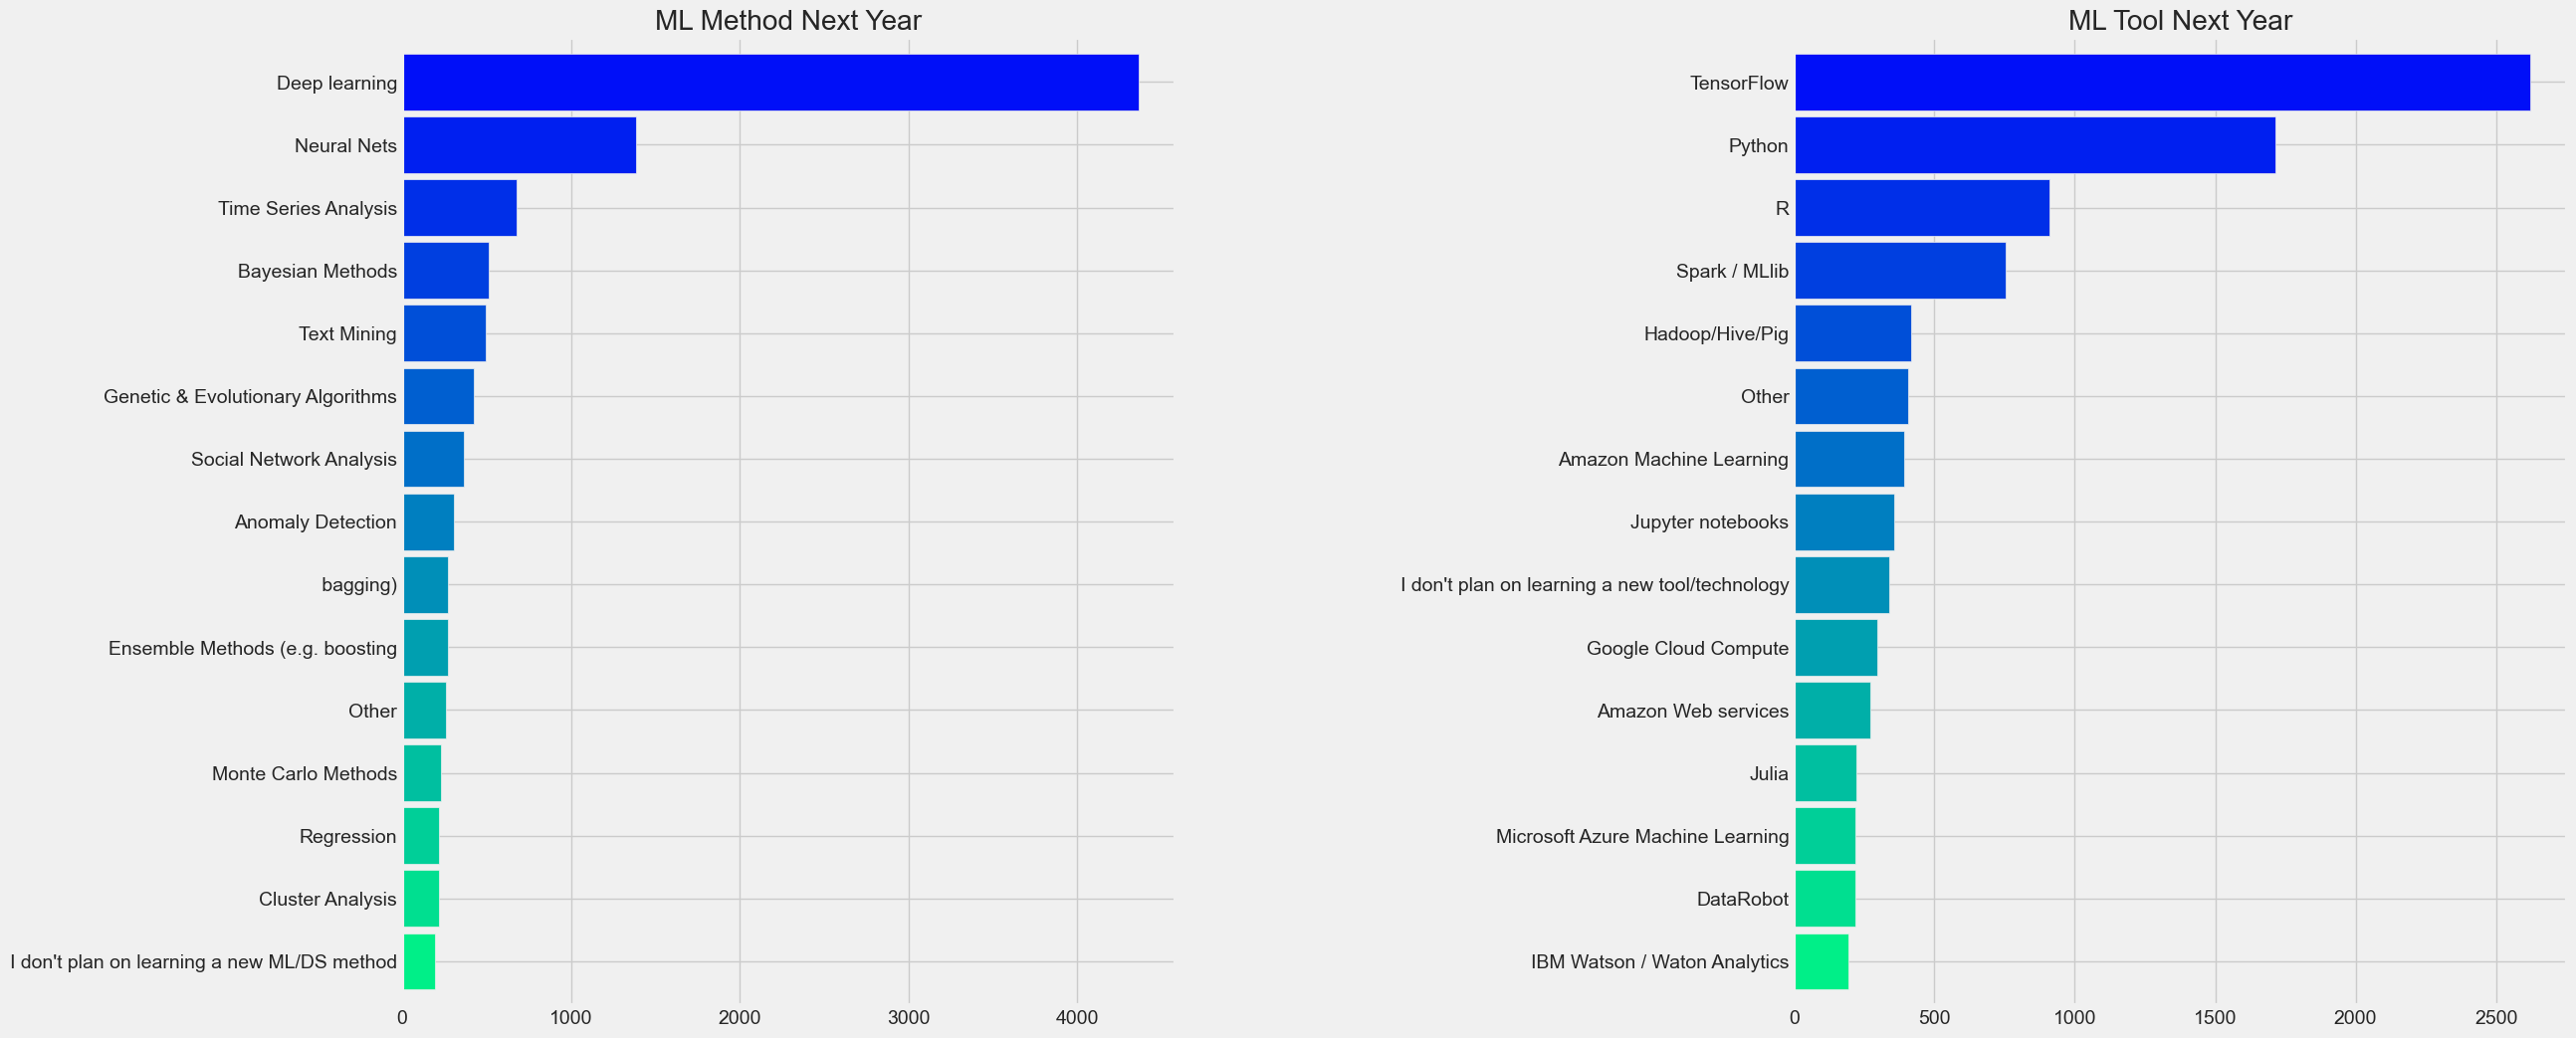

In [21]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
ml_nxt = response['MLMethodNextYearSelect'].str.split(',')
nxt_year = []
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,
                                                                              color=sns.color_palette('winter_r', 15),
                                                                              ax=ax[0])
tool = response['MLToolNextYearSelect'].str.split(',')
tool_nxt = []
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,
                                                                              color=sns.color_palette('winter_r', 15),
                                                                              ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

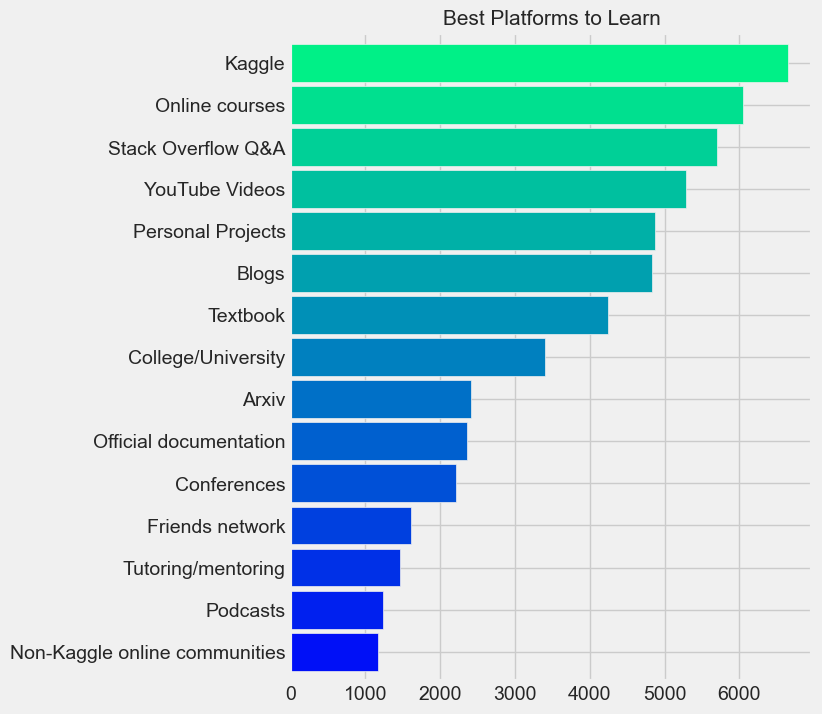

In [22]:
plt.subplots(figsize=(6, 8))
learn = response['LearningPlatformSelect'].str.split(',')
platform = []
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,
                                                                              color=sns.color_palette('winter', 15))
plt.title('Best Platforms to Learn', size=15)
plt.show()

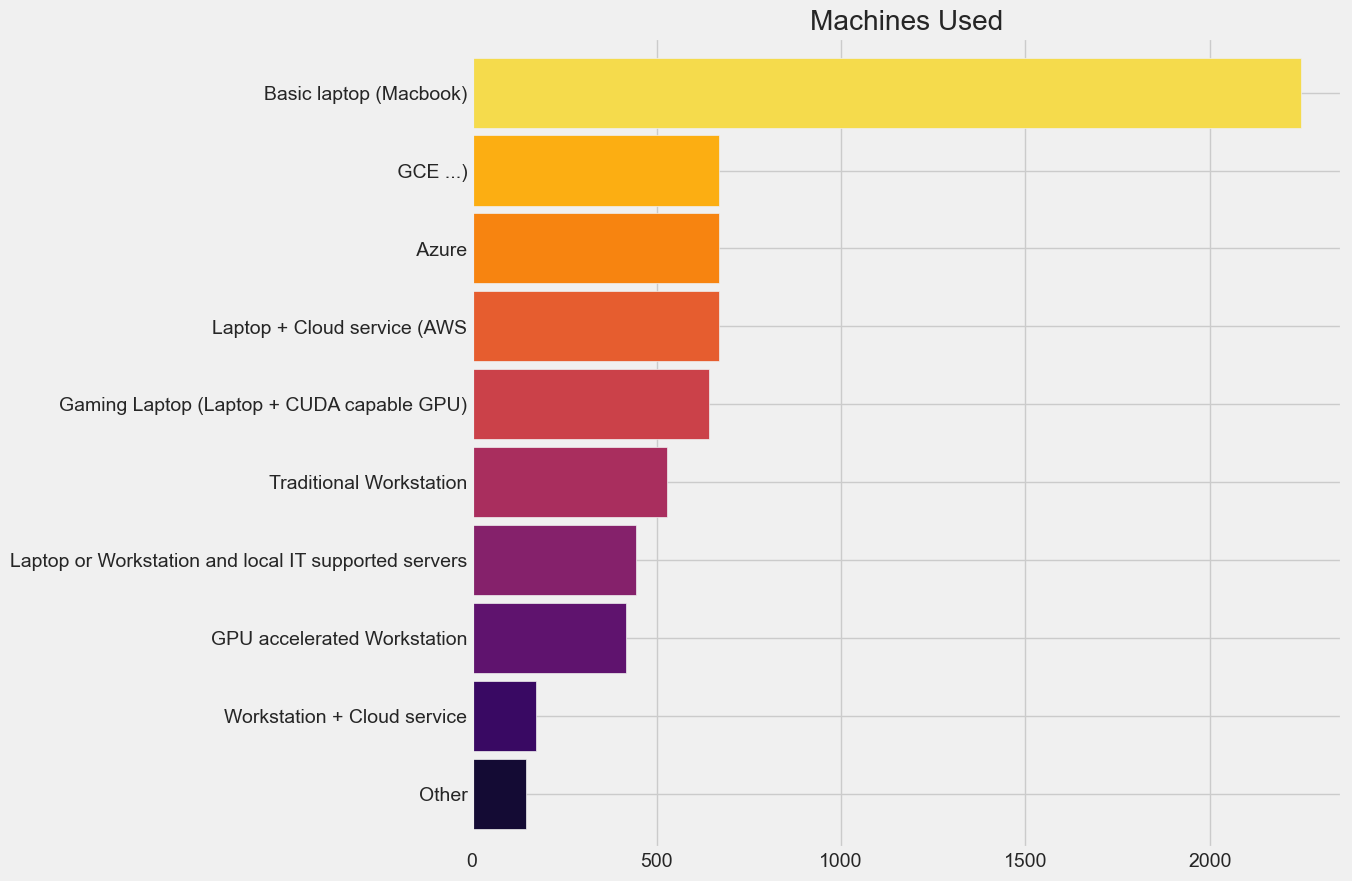

In [23]:
plt.subplots(figsize=(10, 10))
hard = response['HardwarePersonalProjectsSelect'].str.split(',')
hardware = []
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,
                                                                         color=sns.color_palette('inferno', 10))
plt.title('Machines Used')
plt.show()

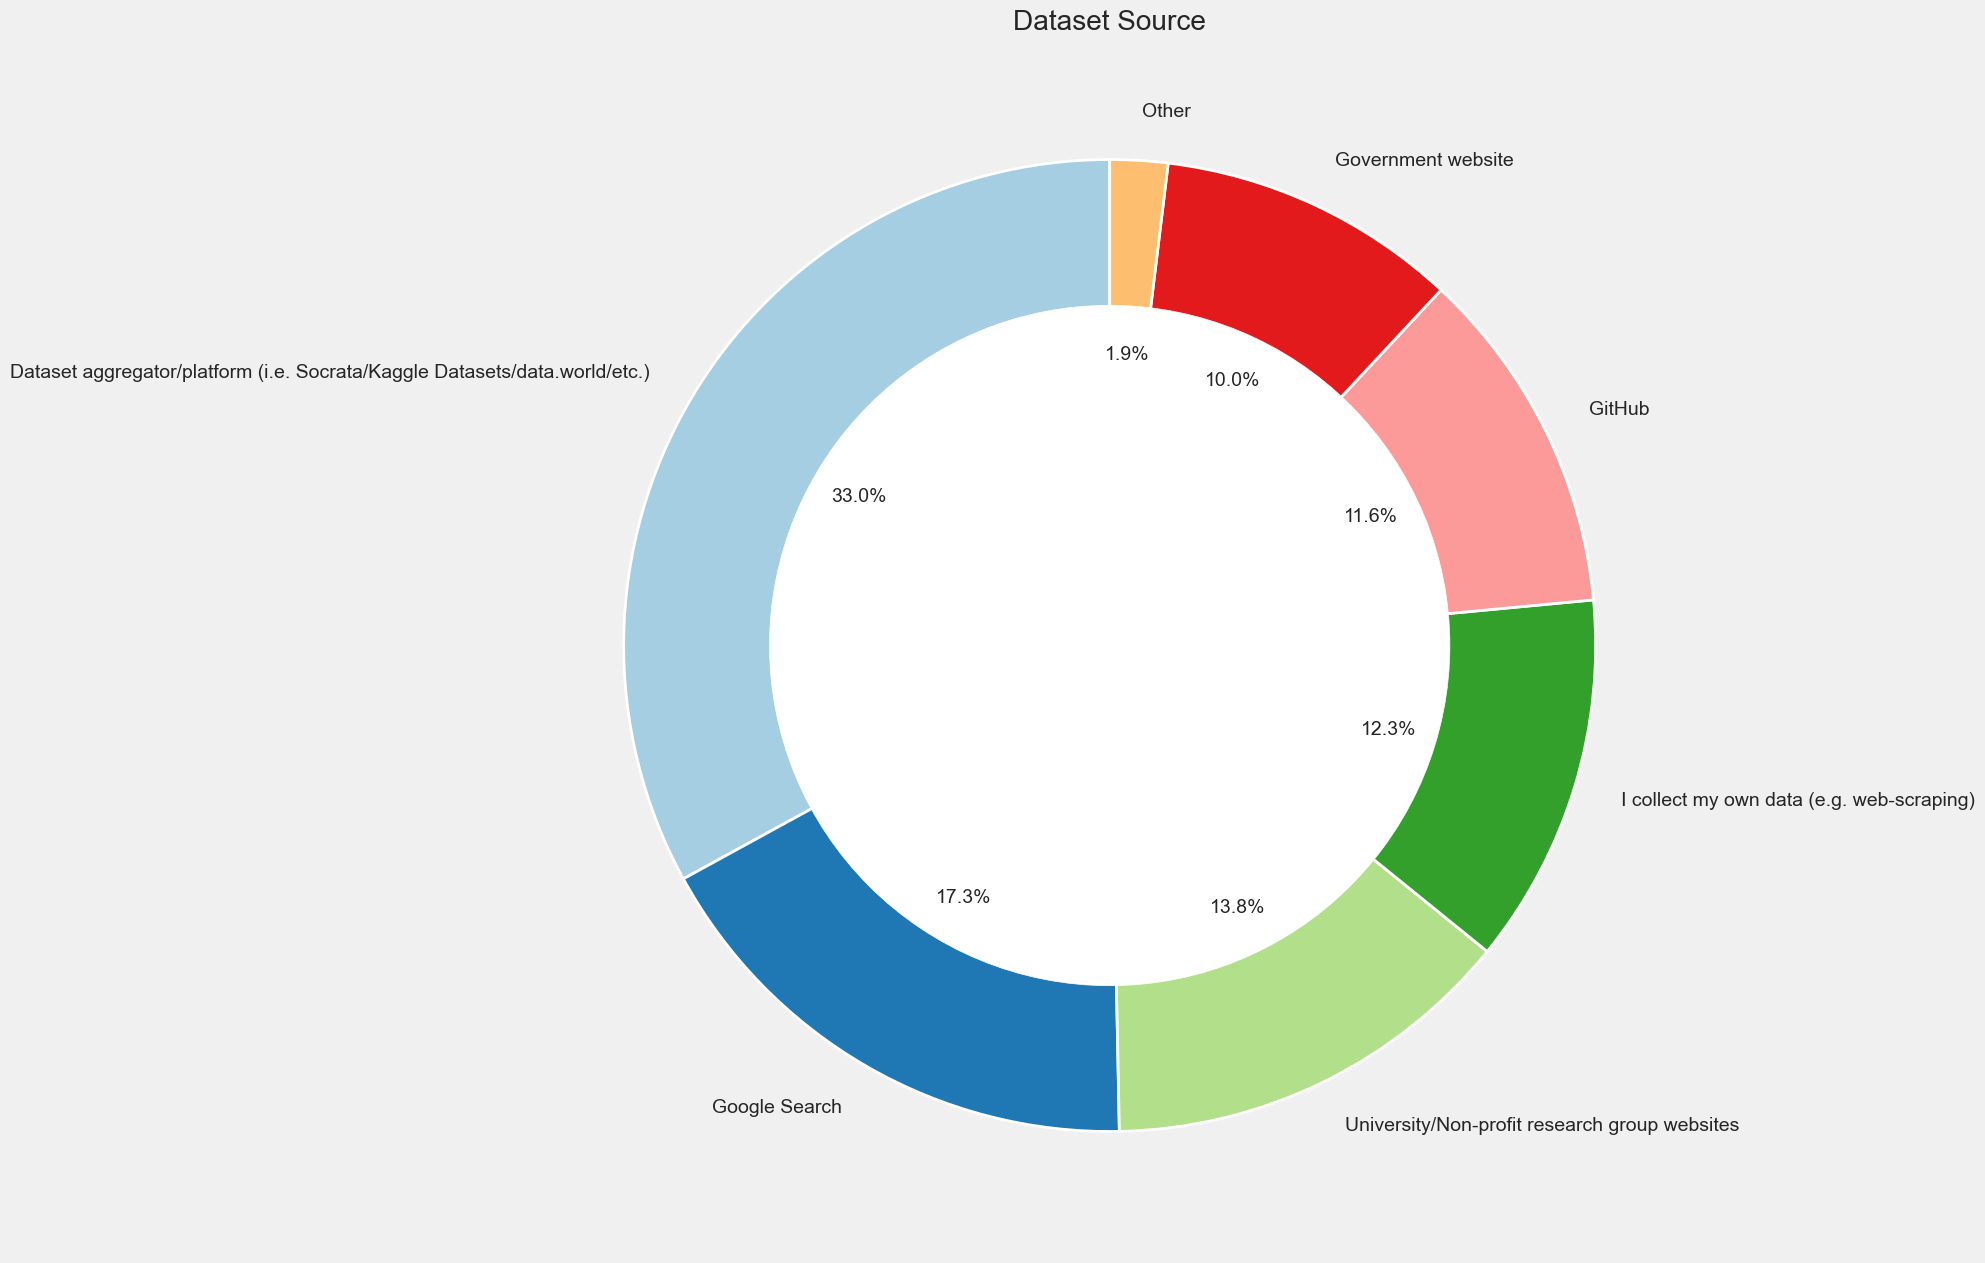

In [24]:
plt.subplots(figsize=(15, 15))
data = response['PublicDatasetsSelect'].str.split(',')
dataset = []
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Paired', 10), startangle=90,
                                           wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Dataset Source')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

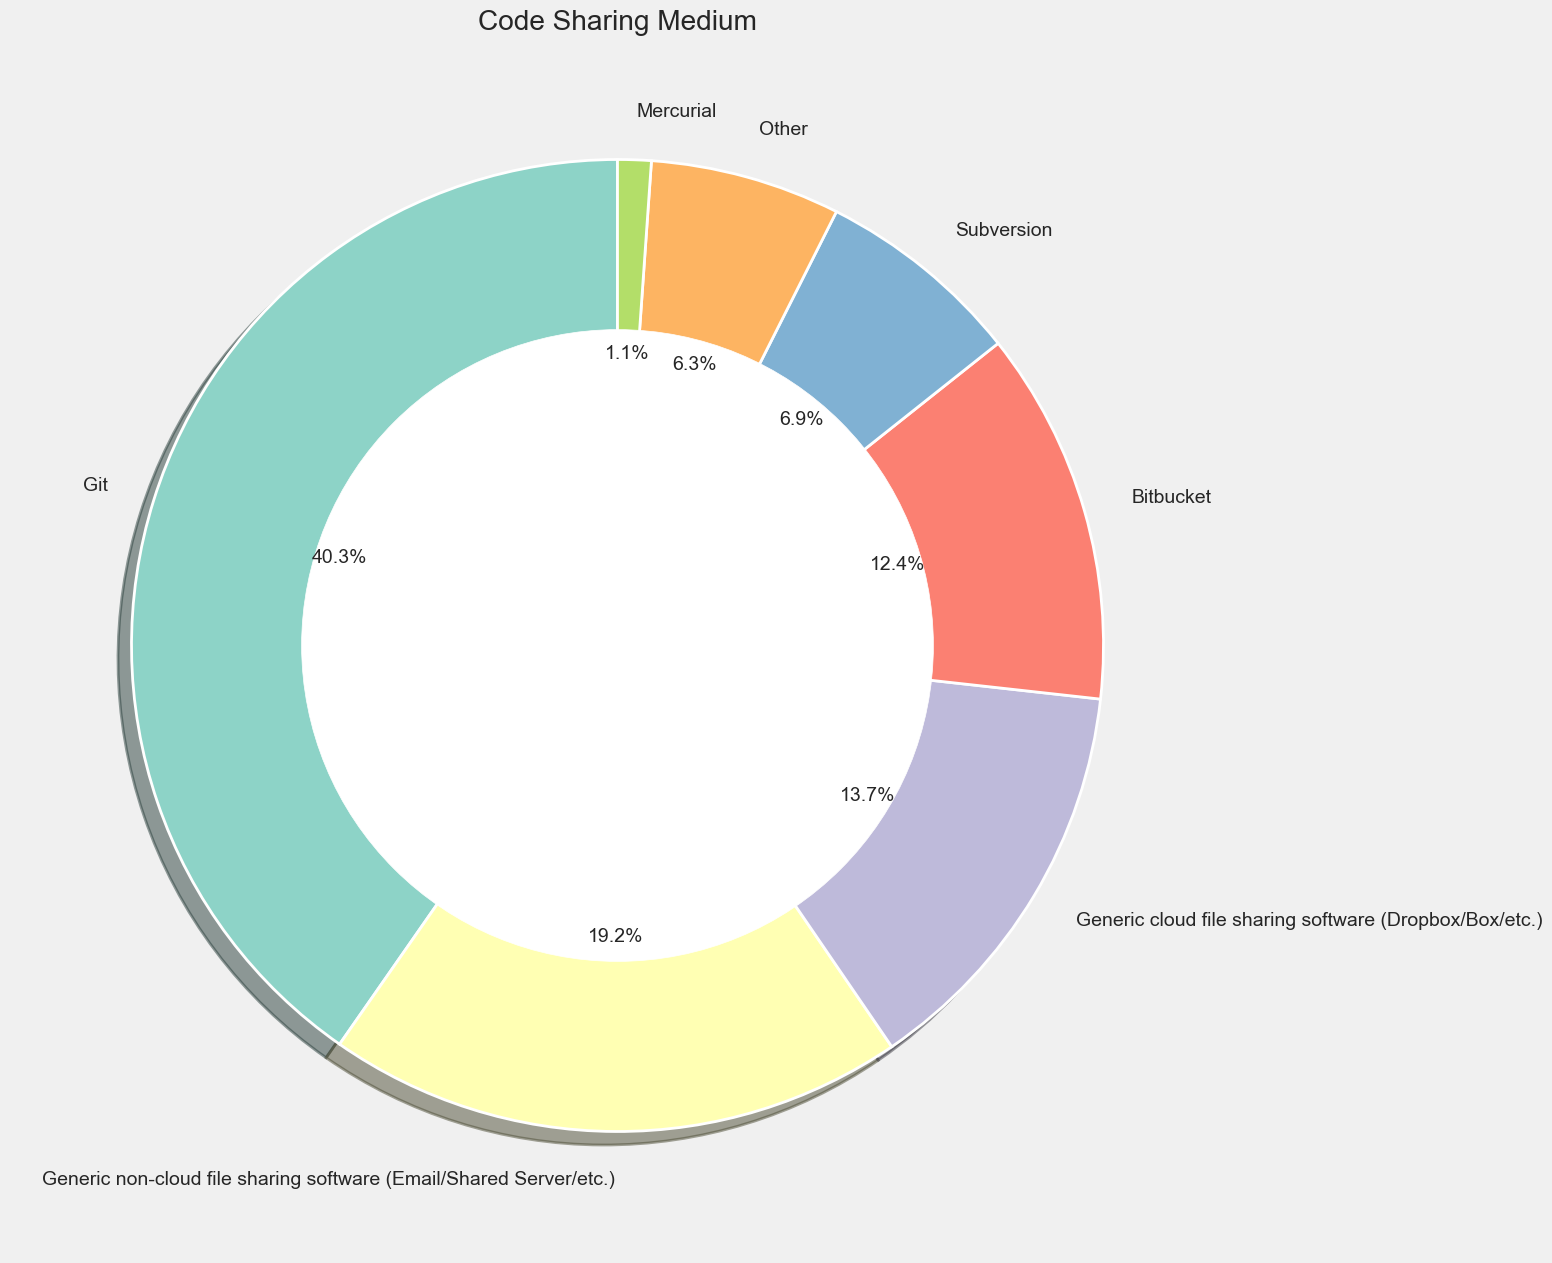

In [25]:
plt.subplots(figsize=(15, 15))
code = response['WorkCodeSharing'].str.split(',')
code_share = []
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=sns.color_palette('Set3', 10),
                                              startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Code Sharing Medium')
my_circle = plt.Circle((0, 0), 0.65, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

KeyError: 0

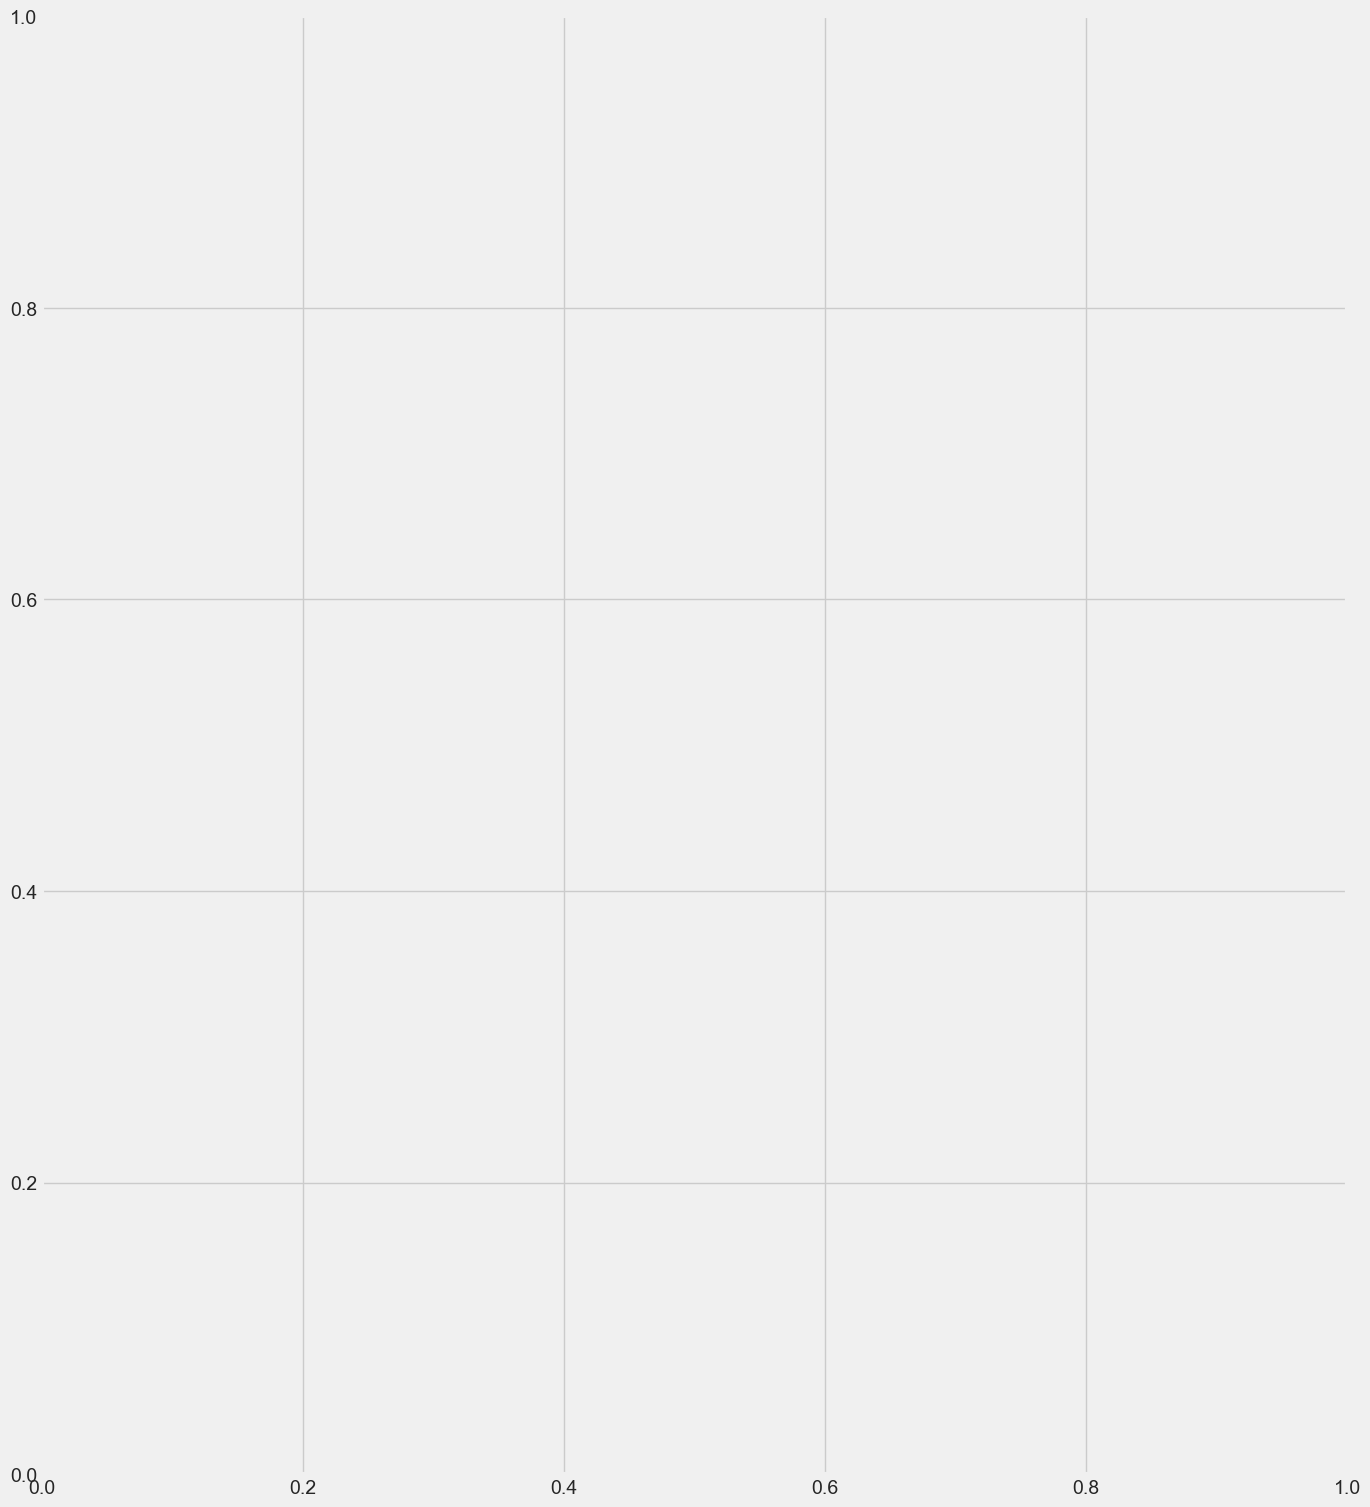

In [26]:
plt.subplots(figsize=(15, 18))
challenge = response['WorkChallengesSelect'].str.split(',')
challenges = []
for i in challenge.dropna():
    challenges.extend(i)
plt1 = pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, palette=sns.color_palette('inferno', 25))
plt.title('Challenges in Data Science')
plt.show()

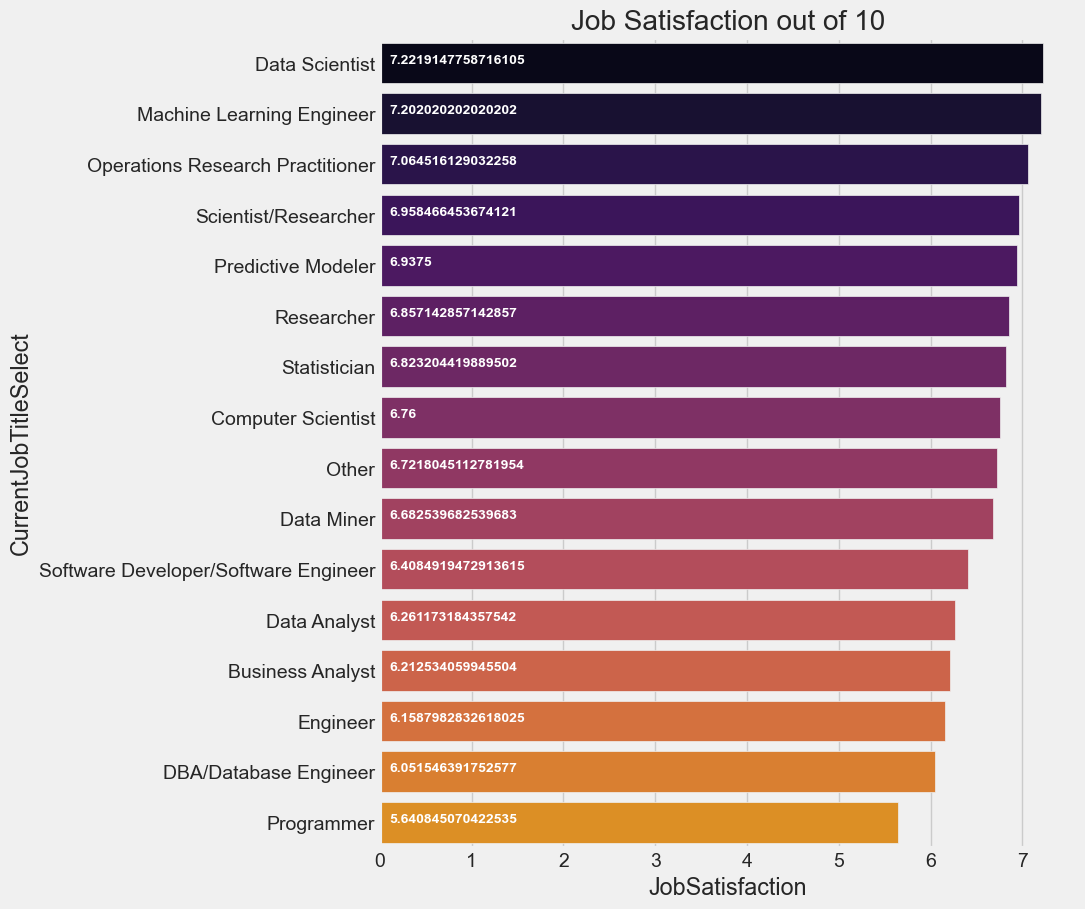

In [27]:
satisfy = response.copy()
satisfy['JobSatisfaction'].replace(
    {'10 - Highly Satisfied': '10', '1 - Highly Dissatisfied': '1', 'I prefer not to share': np.NaN}, inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction'] = satisfy['JobSatisfaction'].astype(int)
satisfy_job = satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(
    ascending=False).to_frame()
ax = sns.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction, palette=sns.color_palette('inferno', 20))
fig = plt.gcf()
fig.set_size_inches(8, 10)
for i, v in enumerate(satisfy_job.JobSatisfaction):
    ax.text(.1, i, v, fontsize=10, color='white', weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

In [28]:
satisfy = response.copy()
satisfy['JobSatisfaction'].replace(
    {'10 - Highly Satisfied': '10', '1 - Highly Dissatisfied': '1', 'I prefer not to share': np.NaN}, inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction'] = satisfy['JobSatisfaction'].astype(int)
satisfy_job = satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
data = [dict(
    type='choropleth',
    autocolorscale=False,
    colorscale='Viridis',
    reversescale=True,
    showscale=True,
    locations=satisfy_job.index,
    z=satisfy_job['JobSatisfaction'],
    locationmode='country names',
    text=satisfy_job['JobSatisfaction'],
    marker=dict(
        line=dict(color='rgb(200,200,200)', width=0.5)),
    colorbar=dict(autotick=True, tickprefix='',
                  title='Satisfaction')
)
]

layout = dict(
    title='Job Satisfaction By Country',
    geo=dict(
        showframe=True,
        showocean=True,
        oceancolor='rgb(0,0,255)',
        projection=dict(
            type='chloropleth',

        ),
        lonaxis=dict(
            showgrid=False,
            gridcolor='rgb(102, 102, 102)'
        ),
        lataxis=dict(
            showgrid=False,
            gridcolor='rgb(102, 102, 102)'
        )
    ),
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

In [29]:
resp = response.dropna(subset=['WorkToolsSelect'])
resp = resp.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
python = resp[(resp['WorkToolsSelect'].str.contains('Python')) & (~resp['WorkToolsSelect'].str.contains('R'))]
R = resp[(~resp['WorkToolsSelect'].str.contains('Python')) & (resp['WorkToolsSelect'].str.contains('R'))]
both = resp[(resp['WorkToolsSelect'].str.contains('Python')) & (resp['WorkToolsSelect'].str.contains('R'))]

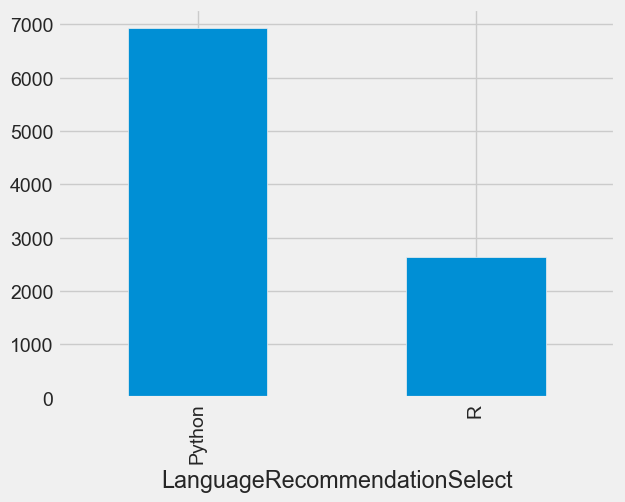

In [30]:
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

In [31]:
labels1 = python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1 = python['LanguageRecommendationSelect'].value_counts()[:5].values

labels2 = R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2 = R['LanguageRecommendationSelect'].value_counts()[:5].values

fig = {
    "data": [
        {
            "values": sizes1,
            "labels": labels1,
            "domain": {"x": [0, .48]},
            "name": "Language",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        },
        {
            "values": sizes2,
            "labels": labels2,
            "text": "CO2",
            "textposition": "inside",
            "domain": {"x": [.54, 1]},
            "name": "Language",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }],
    "layout": {
        "title": "Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'text' property of pie
        Received value: 'CO2'

    The 'text' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

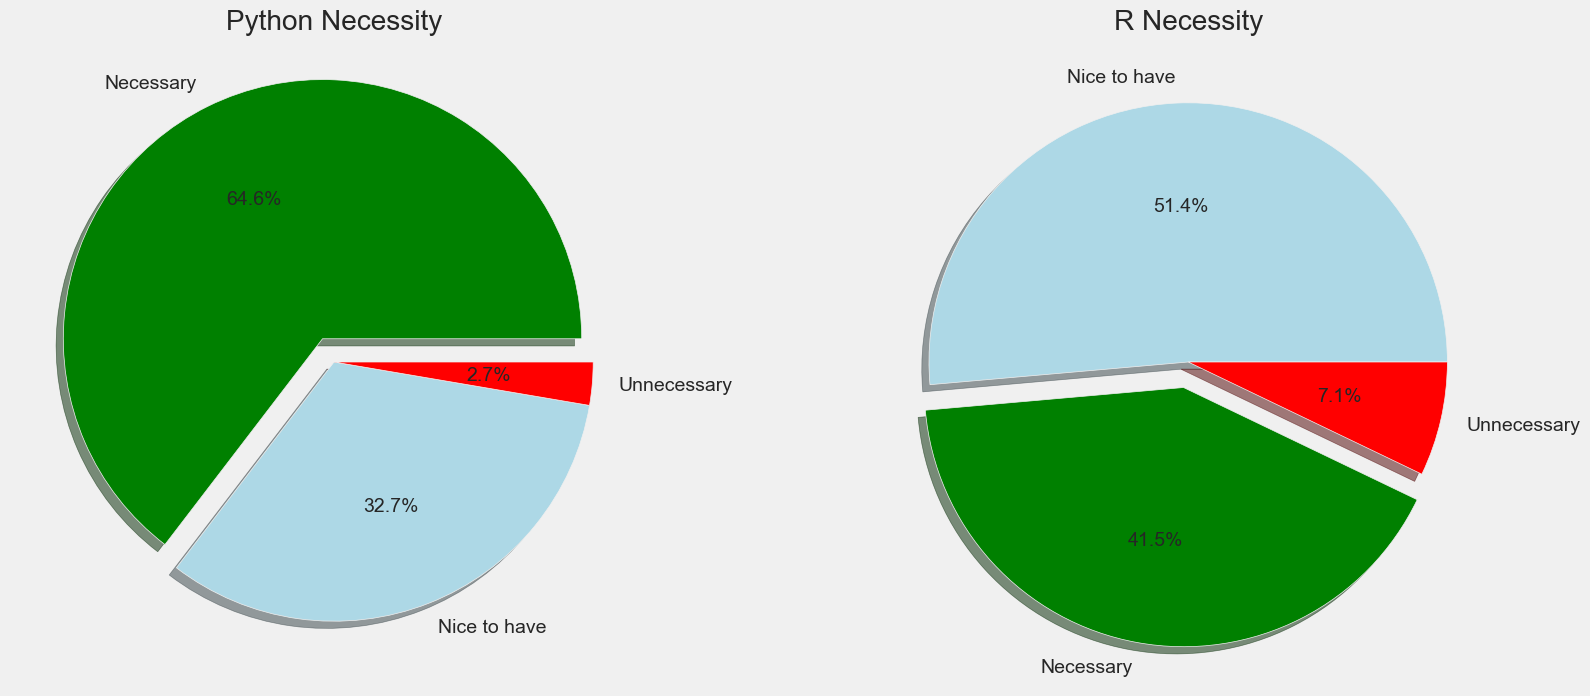

In [32]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', explode=[0.1, 0, 0],
                                                             shadow=True, colors=['g', 'lightblue', 'r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', explode=[0, 0.1, 0], shadow=True,
                                                        colors=['lightblue', 'g', 'r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

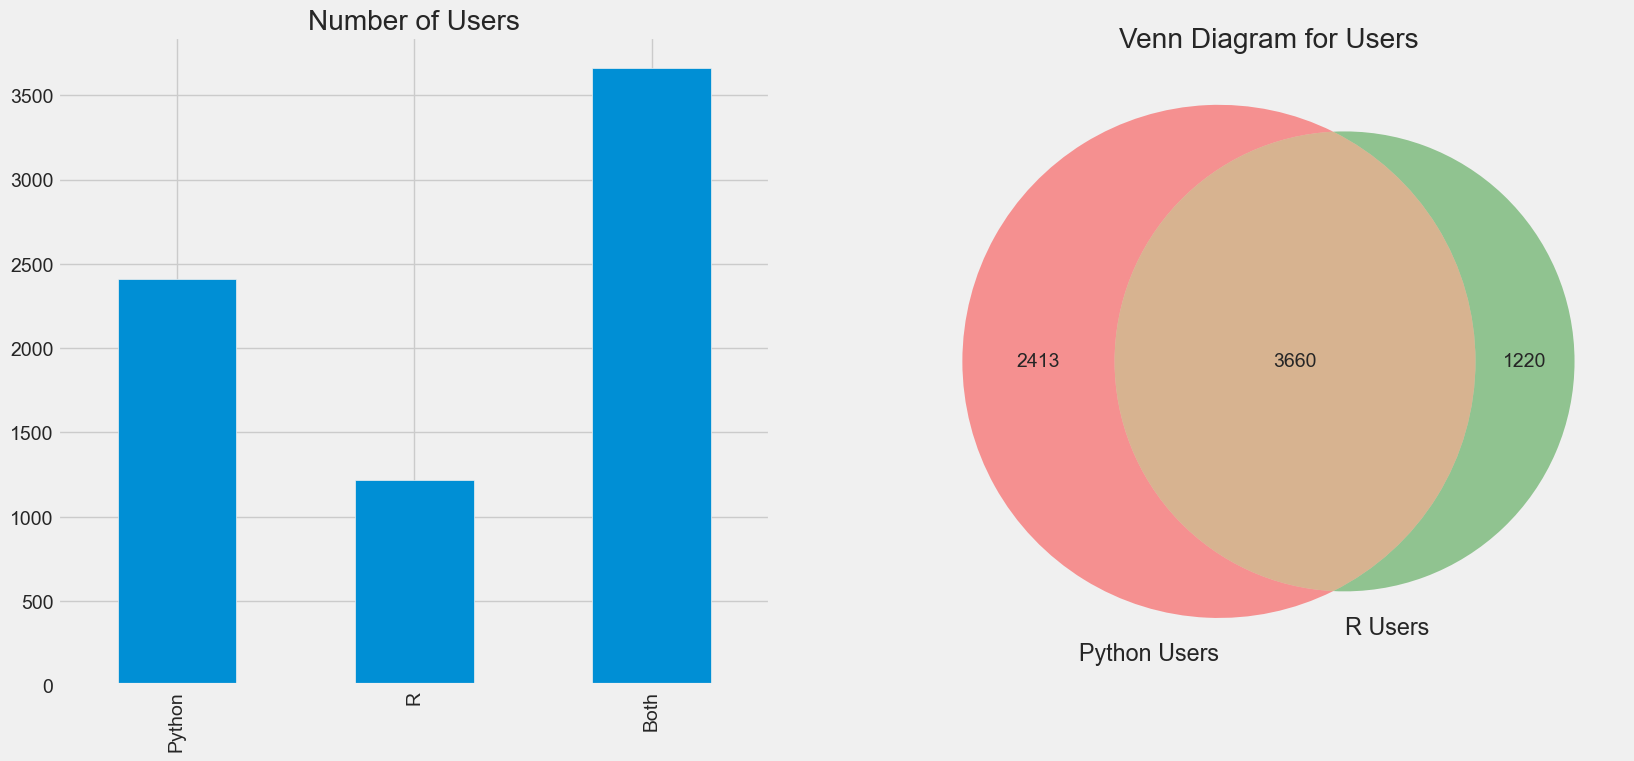

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
pd.Series([python.shape[0], R.shape[0], both.shape[0]], index=['Python', 'R', 'Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets=(python.shape[0], R.shape[0], both.shape[0]), set_labels=('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

In [34]:
py_sal = (pd.to_numeric(python['CompensationAmount'].dropna()) * python['exchangeRate']).dropna()
py_sal = py_sal[py_sal < 1000000]
R_sal = (pd.to_numeric(R['CompensationAmount'].dropna()) * R['exchangeRate']).dropna()
R_sal = R_sal[R_sal < 1000000]
both_sal = (pd.to_numeric(both['CompensationAmount'].dropna()) * both['exchangeRate']).dropna()
both_sal = both_sal[both_sal < 1000000]
trying = pd.DataFrame([py_sal, R_sal, both_sal])
trying = trying.transpose()
trying.columns = ['Python', 'R', 'Both']
print('Median Salary For Individual using Python:', trying['Python'].median())
print('Median Salary For Individual using R:', trying['R'].median())
print('Median Salary For Individual knowing both languages:', trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48422.0
Median Salary For Individual knowing both languages: 59791.3


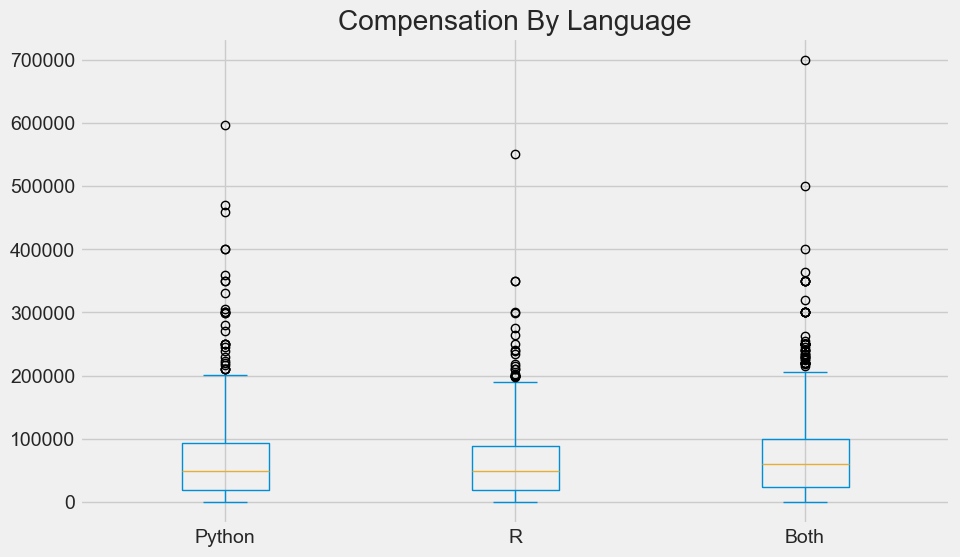

In [35]:
trying.plot.box()
plt.title('Compensation By Language')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

In [36]:
py1 = python.copy()
r = R.copy()
py1['WorkToolsSelect'] = 'Python'
r['WorkToolsSelect'] = 'R'
r_vs_py = pd.concat([py1, r])
r_vs_py = r_vs_py.groupby(['CurrentJobTitleSelect', 'WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect', 'WorkToolsSelect', 'Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.title('Job Title vs Language Used', size=15)
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [37]:
r_vs_py = pd.concat([py1, r])
r_vs_py = r_vs_py.groupby(['JobFunctionSelect', 'WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect', 'WorkToolsSelect', 'Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.title('Job Description vs Language Used')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [38]:
r_vs_py = pd.concat([py1, r])
r_vs_py = r_vs_py.groupby(['Tenure', 'WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure', 'WorkToolsSelect', 'Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Job Tenure vs Language Used')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [39]:
r_vs_py = pd.concat([py1, r])
r_vs_py = r_vs_py.groupby(['EmployerIndustry', 'WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry', 'WorkToolsSelect', 'Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Industry vs Language Used')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

KeyError: 0

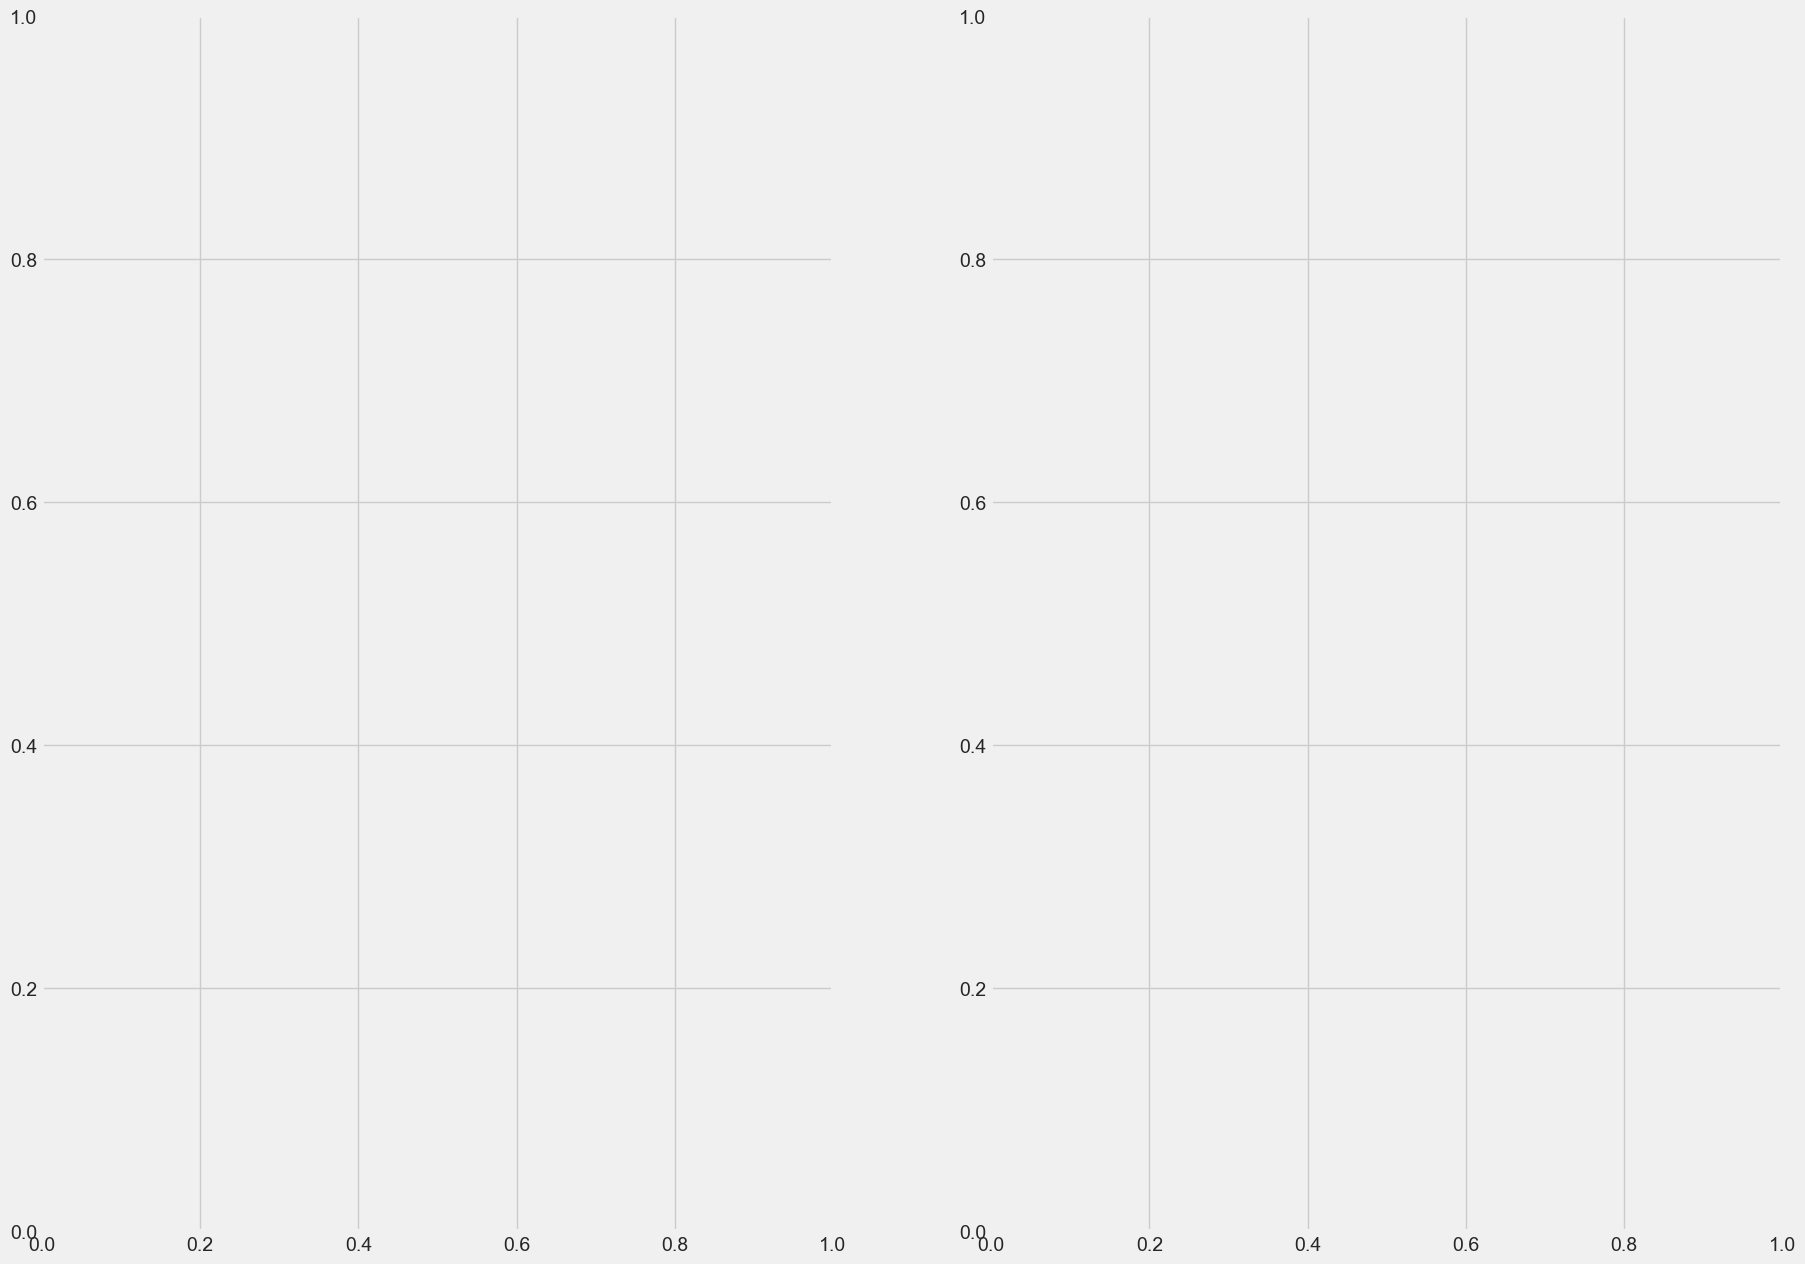

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 15))
py_comp = python['WorkToolsSelect'].str.split(',')
py_comp1 = []
for i in py_comp:
    py_comp1.extend(i)
plt1 = pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[0], palette=sns.color_palette('inferno_r', 15))
R_comp = R['WorkToolsSelect'].str.split(',')
R_comp1 = []
for i in R_comp:
    R_comp1.extend(i)
plt1 = pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[1], palette=sns.color_palette('inferno_r', 15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

In [41]:
response['DataScienceIdentitySelect'].value_counts()

DataScienceIdentitySelect
No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: count, dtype: int64

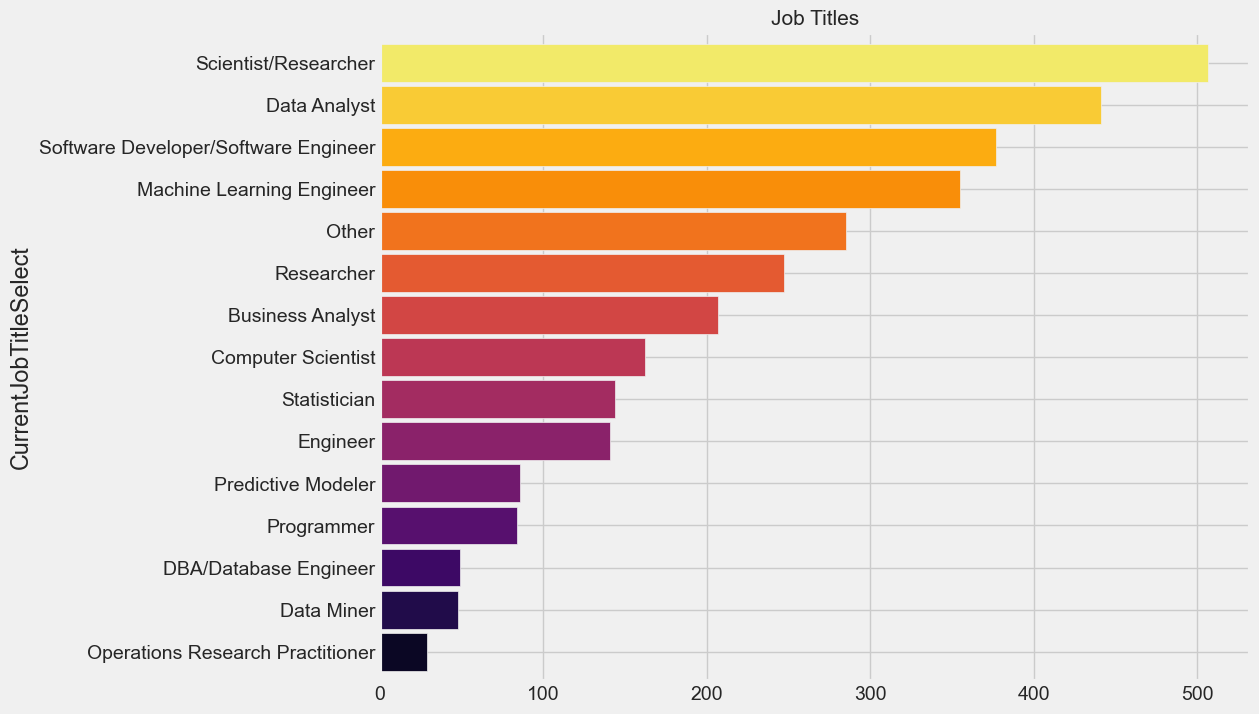

In [42]:
plt.subplots(figsize=(10, 8))
scientist = response[response['DataScienceIdentitySelect'] == 'Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,
                                                                                        color=sns.color_palette(
                                                                                            'inferno', 15))
plt.title('Job Titles', size=15)
plt.show()

In [43]:
true = response[response['CurrentJobTitleSelect'] == 'Data Scientist']

In [44]:
scientist = pd.concat([scientist, true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

AttributeError: 'DataFrame' object has no attribute 'Country'

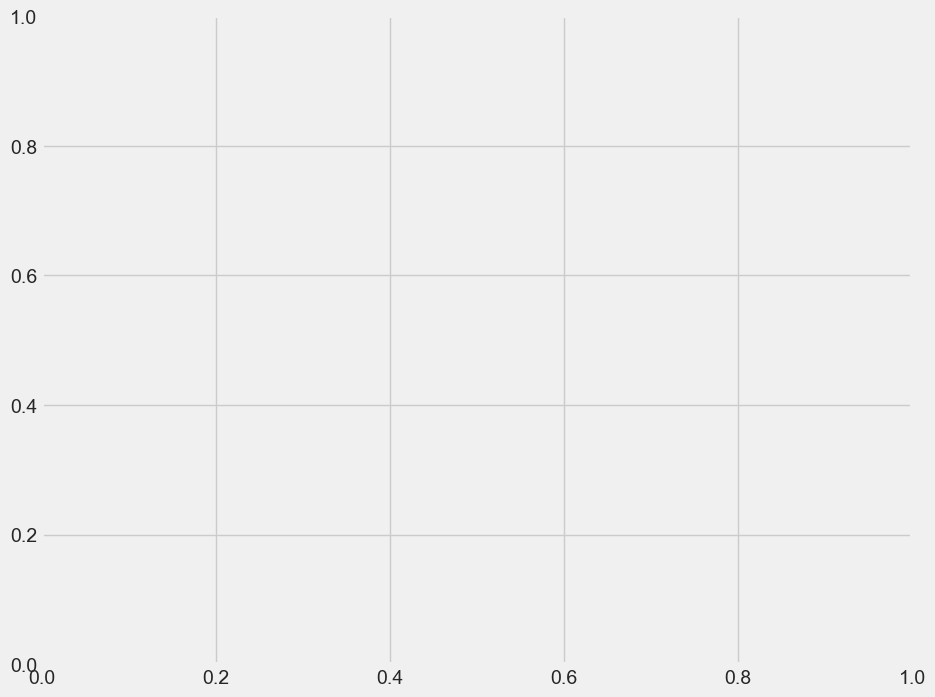

In [45]:
plt.subplots(figsize=(10, 8))
coun = scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country, coun.index, palette='inferno')
plt.title('Countries By Number Of Data Scientists', size=15)
plt.show()

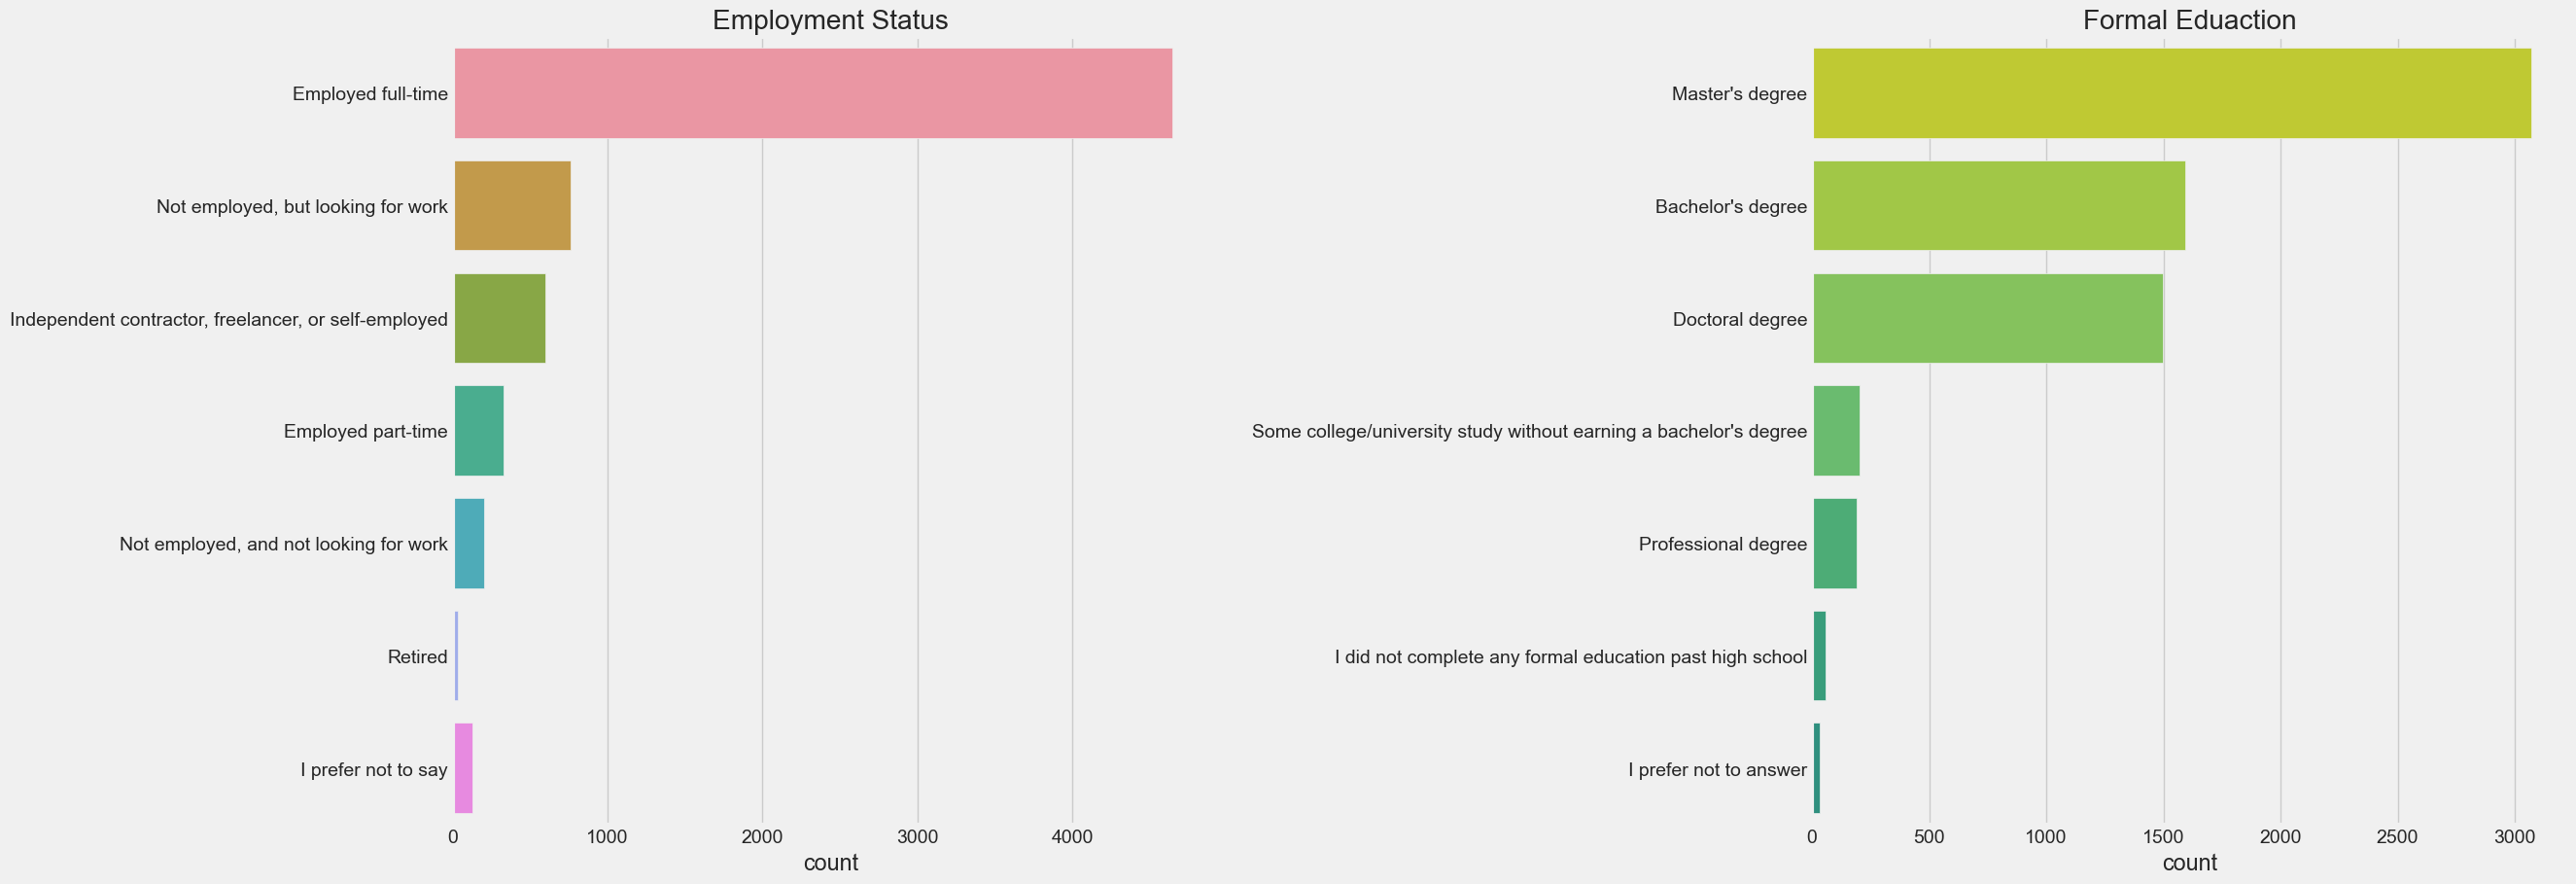

In [46]:
f, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(y=scientist['EmploymentStatus'], ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'], order=scientist['FormalEducation'].value_counts().index, ax=ax[1],
              palette=sns.color_palette('viridis_r', 15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

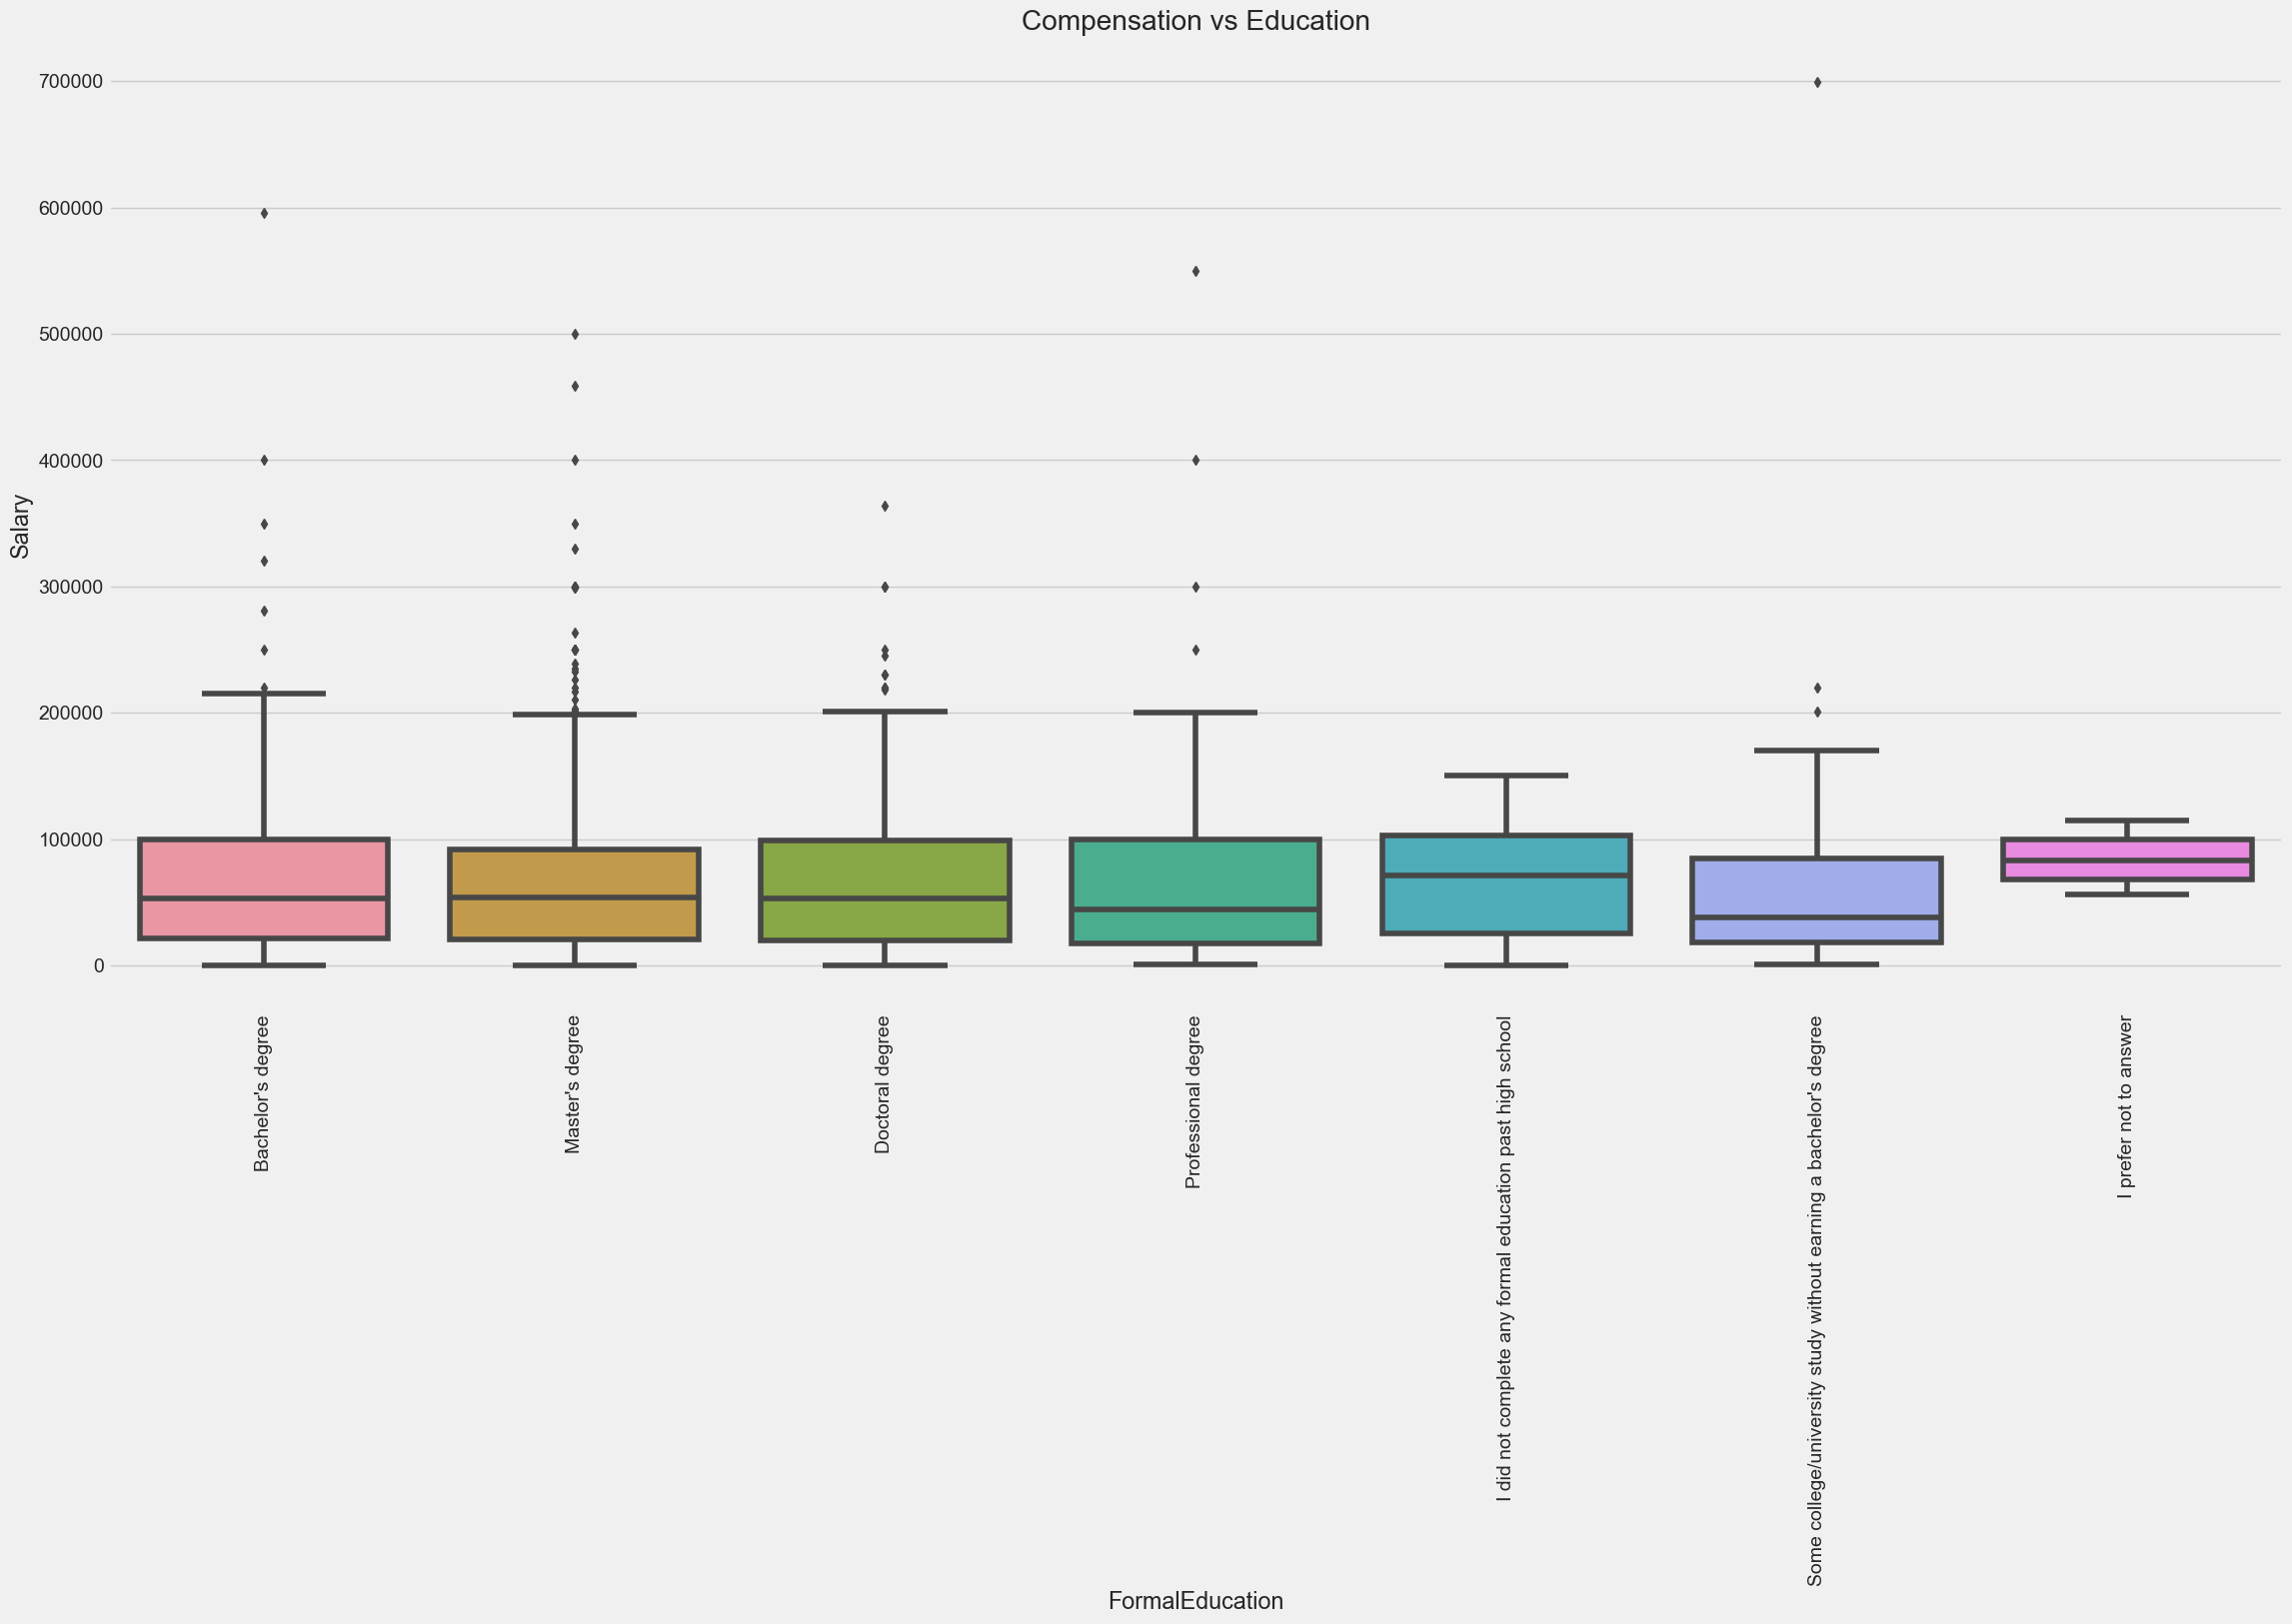

In [47]:
plt.subplots(figsize=(25, 12))
comp_edu = scientist.merge(salary, left_index=True, right_index=True, how='left')
comp_edu = comp_edu[['FormalEducation', 'Salary']]
sns.boxplot(x='FormalEducation', y='Salary', data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

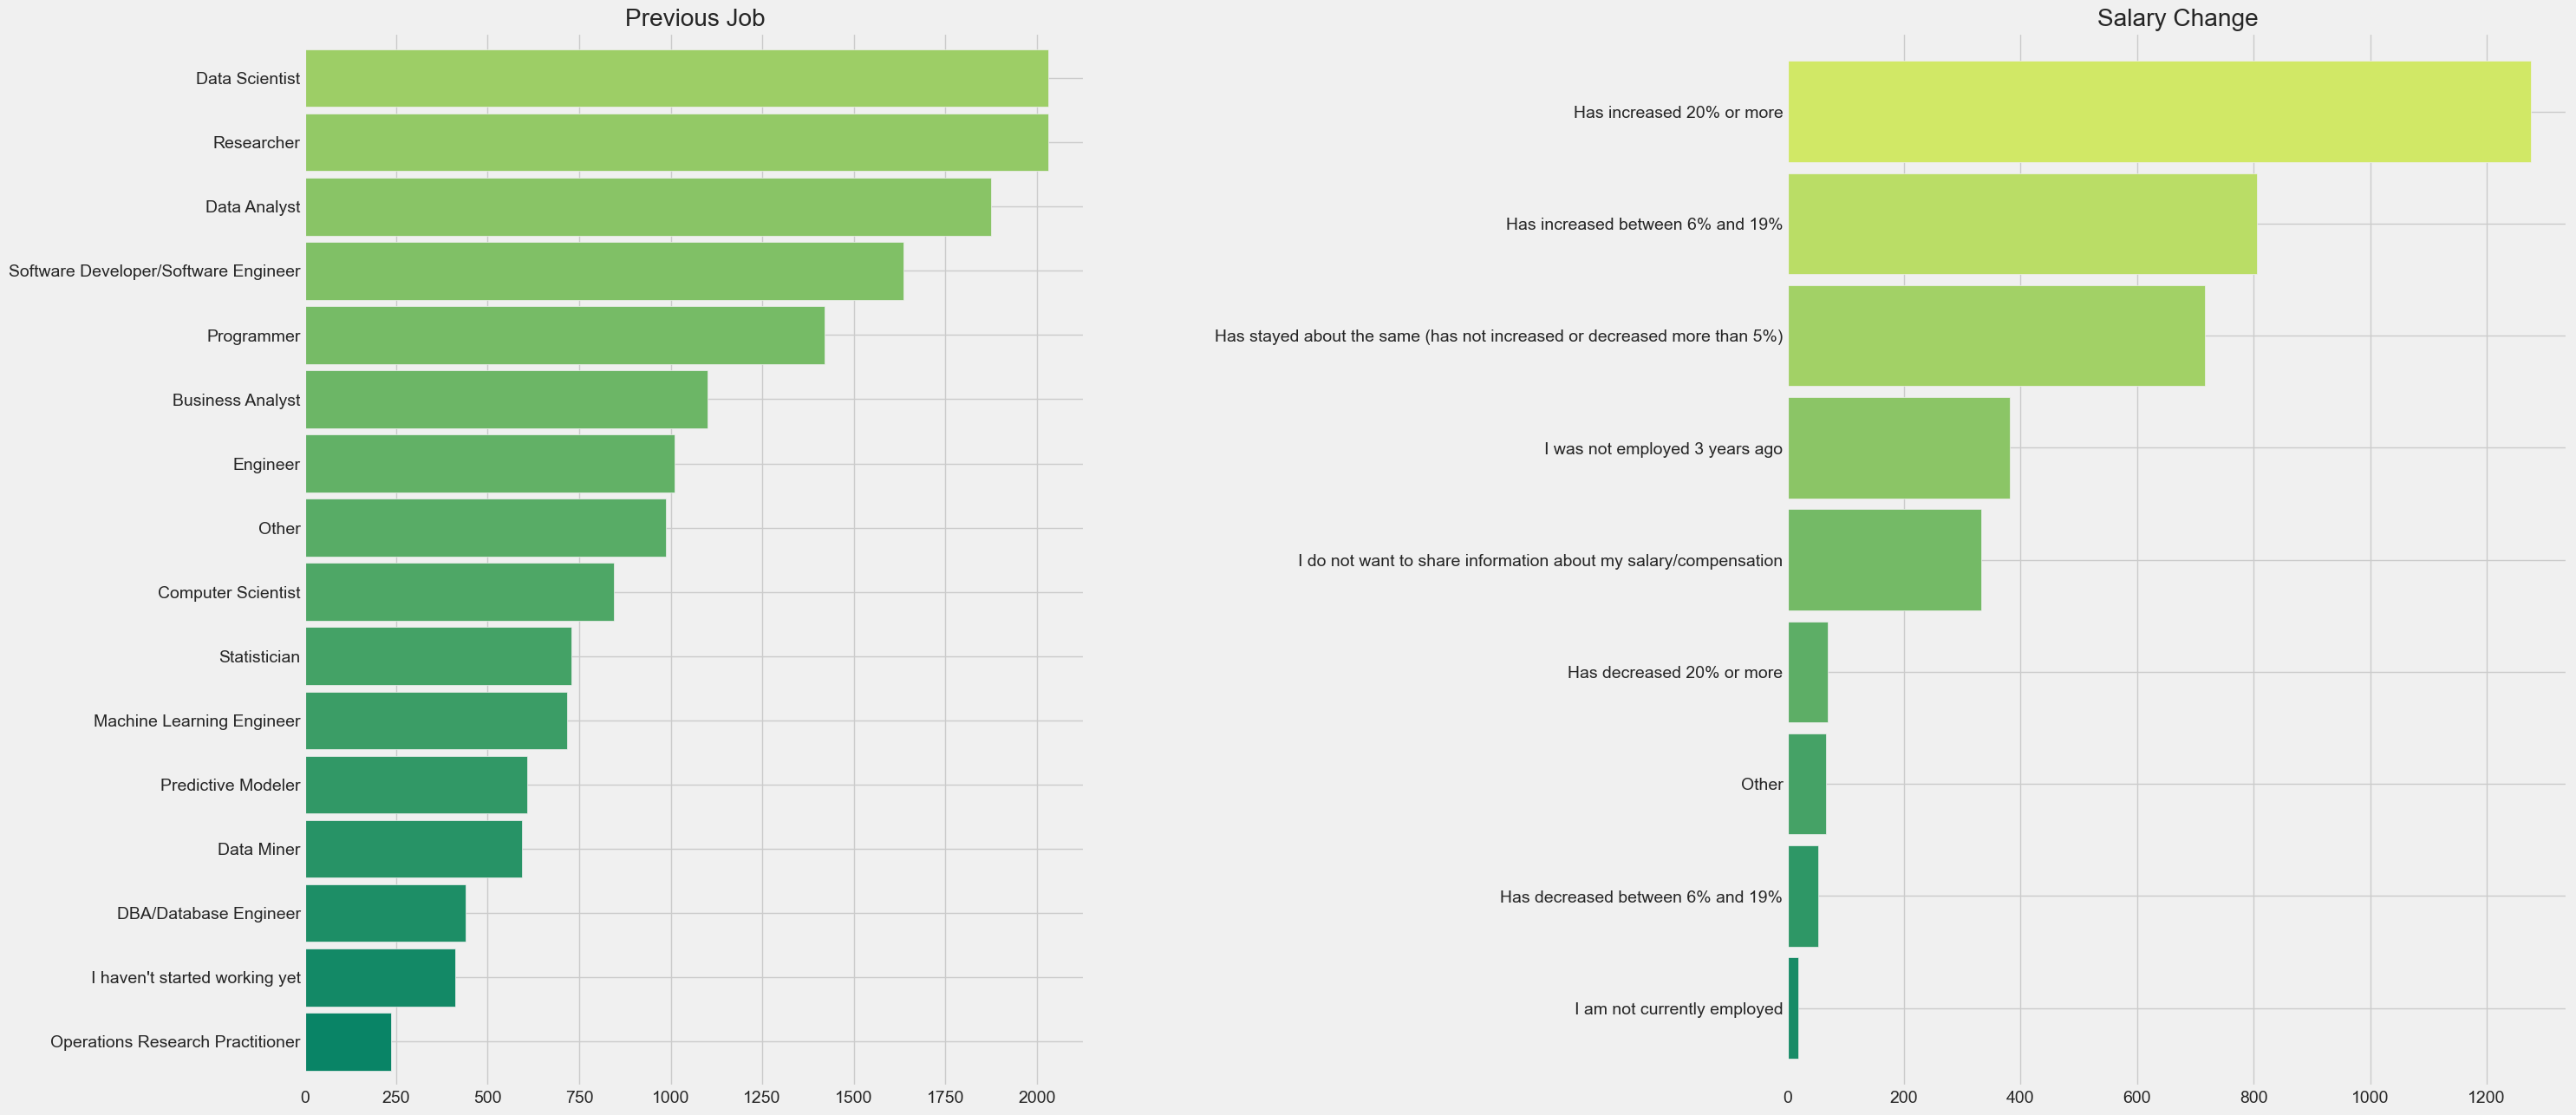

In [48]:
f, ax = plt.subplots(1, 2, figsize=(30, 15))
past = scientist['PastJobTitlesSelect'].str.split(',')
past_job = []
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,
                                                                         color=sns.color_palette('summer', 25),
                                                                         ax=ax[0])
ax[0].set_title('Previous Job')
sal = scientist['SalaryChange'].str.split(',')
sal_change = []
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,
                                                                           color=sns.color_palette('summer', 10),
                                                                           ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

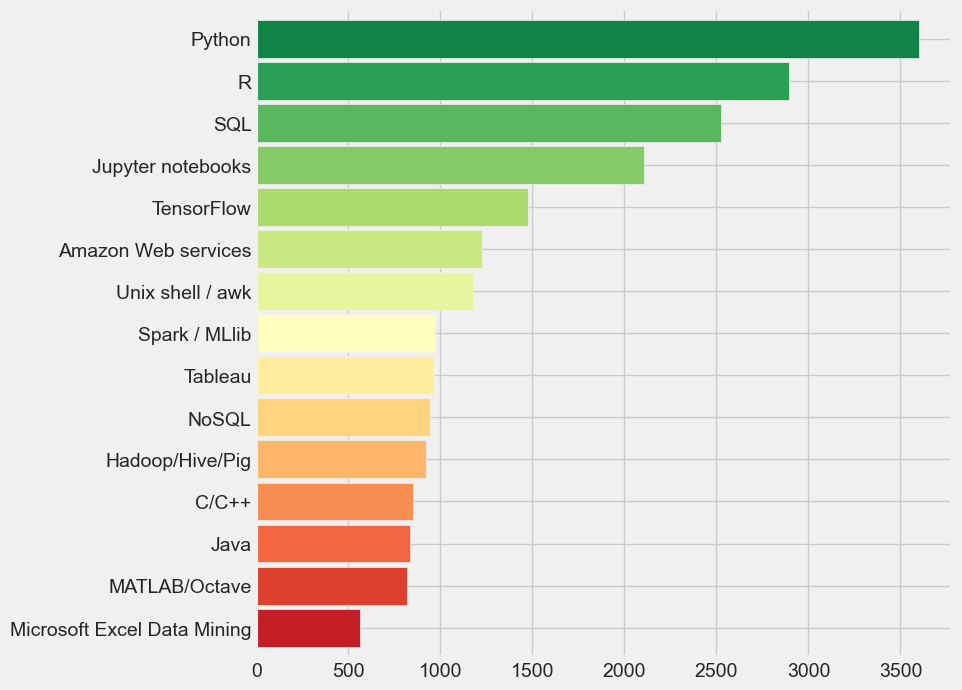

In [49]:
plt.subplots(figsize=(8, 8))
tools = scientist['WorkToolsSelect'].str.split(',')
tools_work = []
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,
                                                                                color=sns.color_palette('RdYlGn', 15))
plt.show()

In [50]:
course = scientist['CoursePlatformSelect'].str.split(',')
course_plat = []
for i in course.dropna():
    course_plat.extend(i)
course_plat = pd.Series(course_plat).value_counts()
blogs = scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam = []
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam = pd.Series(blogs_fam).value_counts()
labels1 = course_plat.index
sizes1 = course_plat.values

labels2 = blogs_fam[:5].index
sizes2 = blogs_fam[:5].values

fig = {
    "data": [
        {
            "values": sizes1,
            "labels": labels1,
            "domain": {"x": [0, .48]},
            "name": "MOOC",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        },
        {
            "values": sizes2,
            "labels": labels2,
            "text": "CO2",
            "textposition": "inside",
            "domain": {"x": [.54, 1]},
            "name": "Blog",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }],
    "layout": {
        "title": "Blogs and Online Platforms",
        "showlegend": True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'text' property of pie
        Received value: 'CO2'

    The 'text' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

ValueError: Number of rows must be a positive integer, not 2.0

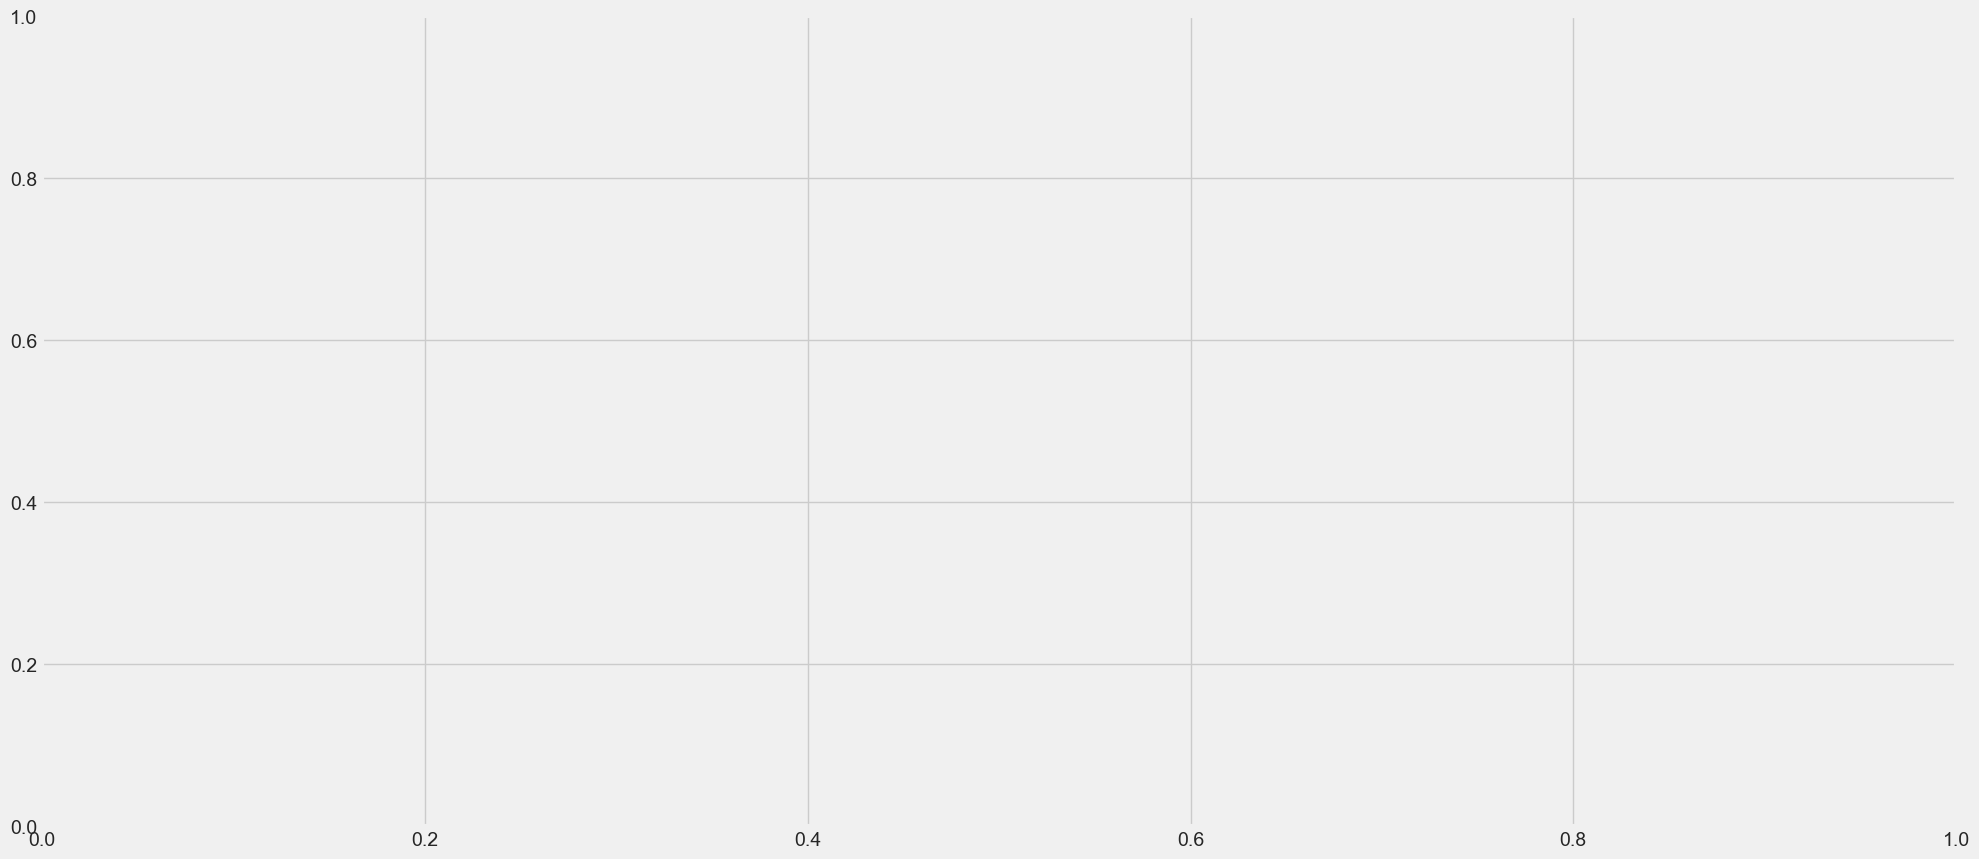

In [51]:
import itertools

plt.subplots(figsize=(22, 10))
time_spent = ['TimeFindingInsights', 'TimeVisualizing', 'TimeGatheringData', 'TimeModelBuilding']
length = len(time_spent)
for i, j in itertools.zip_longest(time_spent, range(length)):
    plt.subplot((length / 2), 2, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    scientist[i].hist(bins=10, edgecolor='black')
    plt.axvline(scientist[i].mean(), linestyle='dashed', color='r')
    plt.title(i, size=20)
    plt.xlabel('% Time')
plt.show()

ValueError: Number of rows must be a positive integer, not 3.5

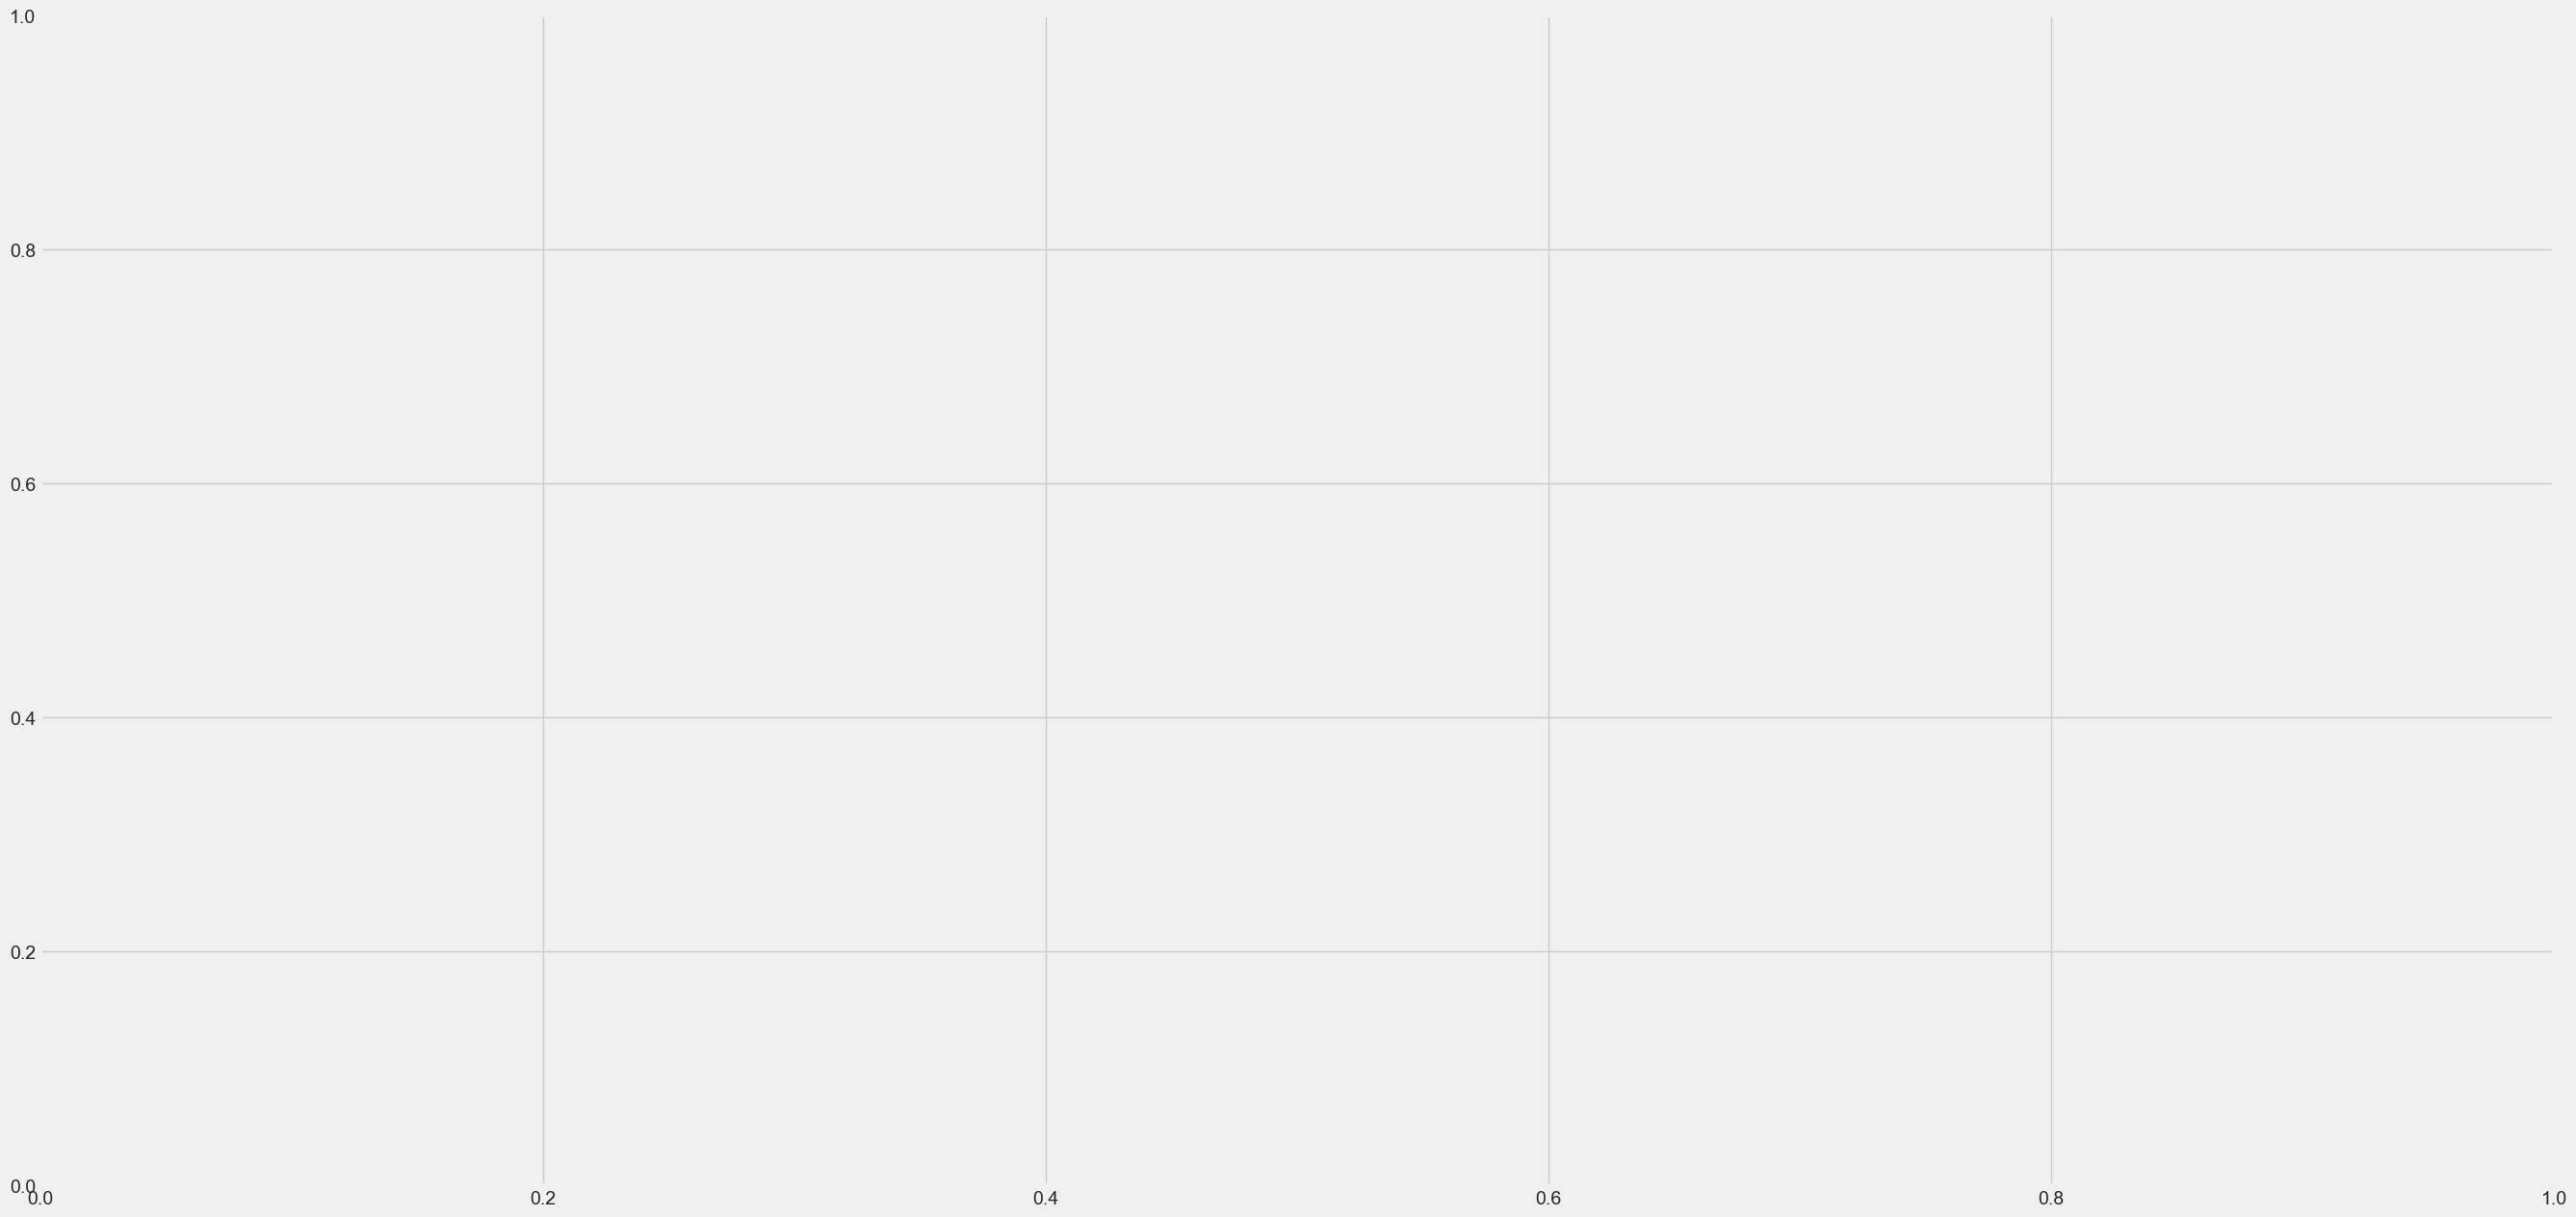

In [52]:
cloud = ['WorkToolsFrequencyAmazonML', 'WorkToolsFrequencyAWS', 'WorkToolsFrequencyCloudera',
         'WorkToolsFrequencyHadoop', 'WorkToolsFrequencyAzure']
plt.subplots(figsize=(30, 15))
length = len(cloud)
for i, j in itertools.zip_longest(cloud, range(length)):
    plt.subplot((length / 2 + 1), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.countplot(i, data=scientist)
    plt.title(i, size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

ValueError: could not convert string to float: 'Nice to have'

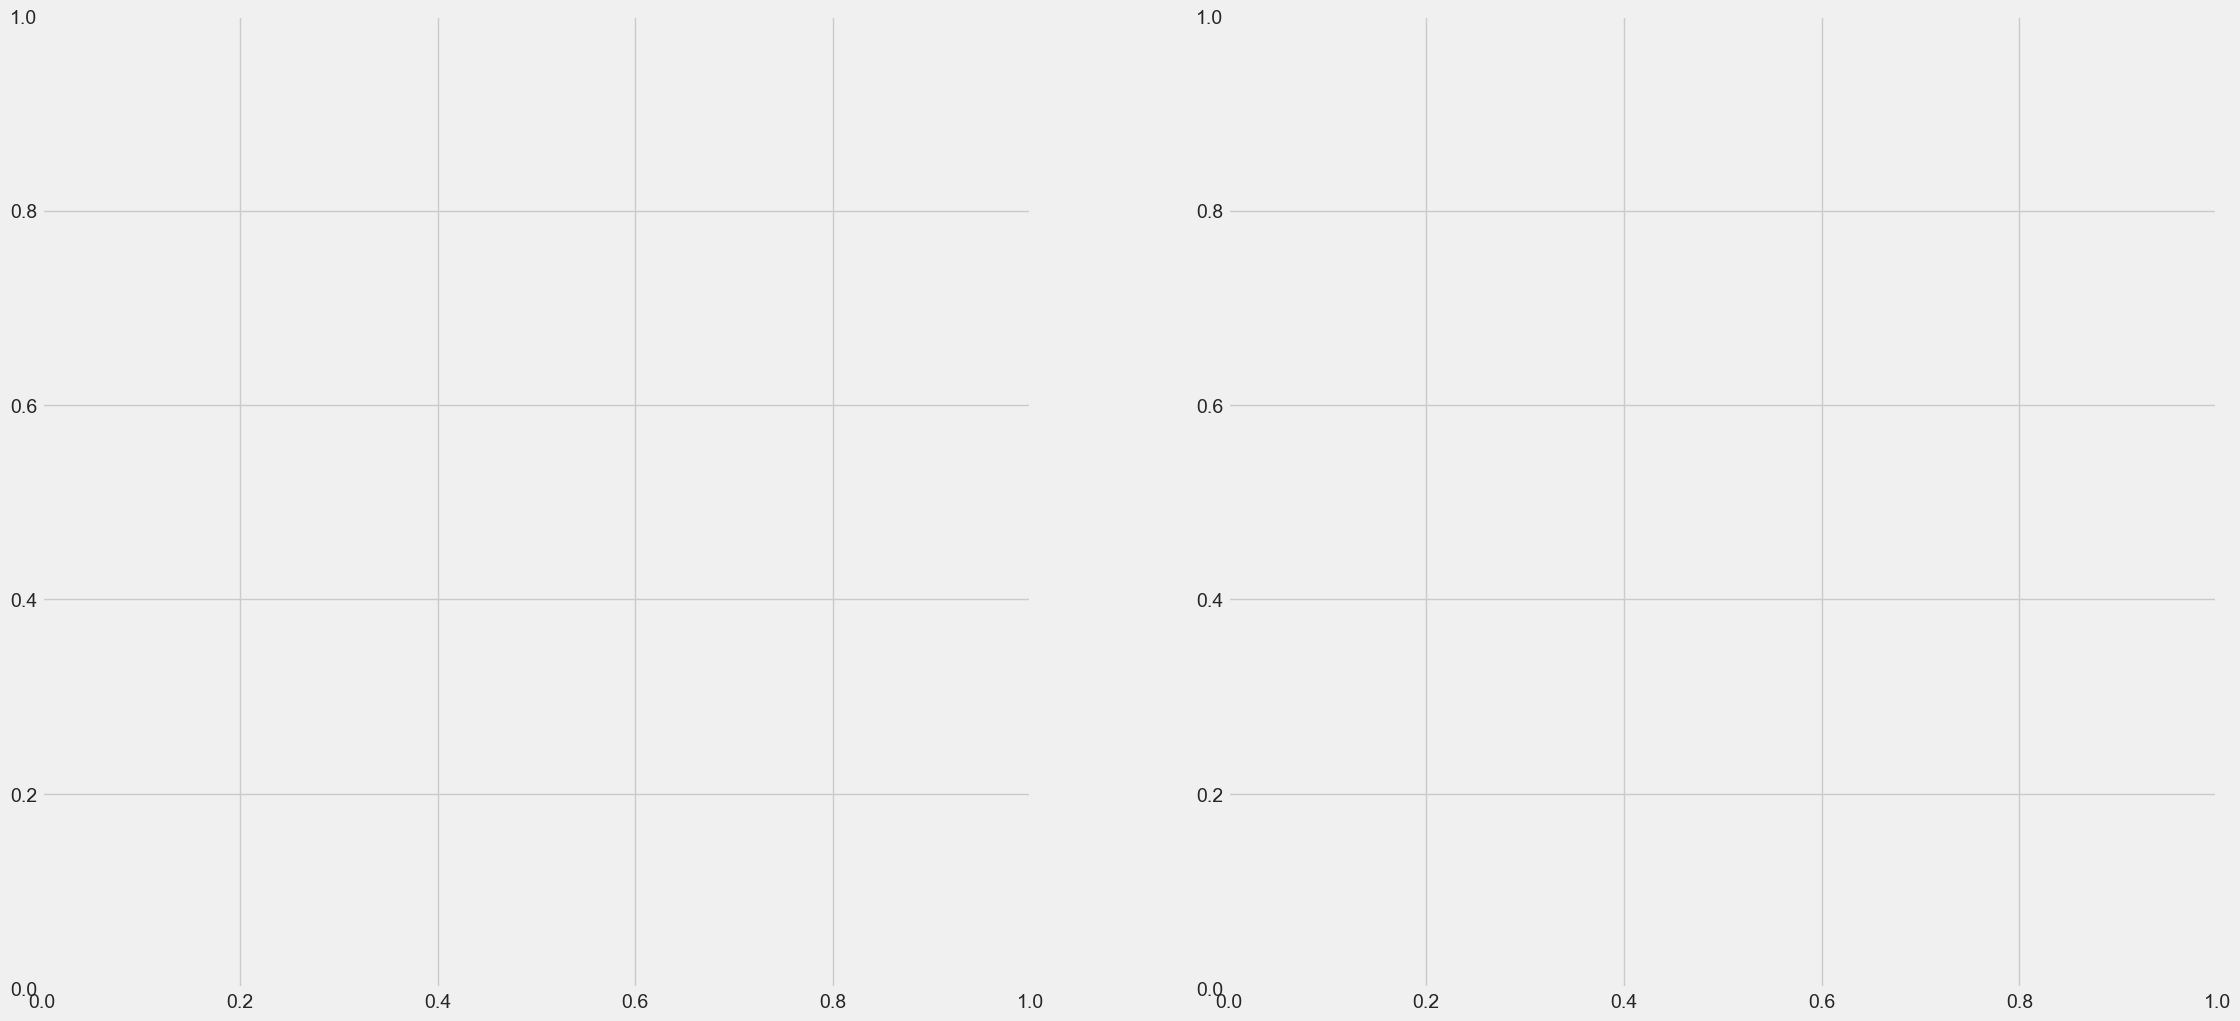

In [53]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
sns.countplot(scientist['JobSkillImportanceVisualizations'], ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%', colors=sns.color_palette('Paired', 10),
                                                            ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

ValueError: Number of rows must be a positive integer, not 4.0

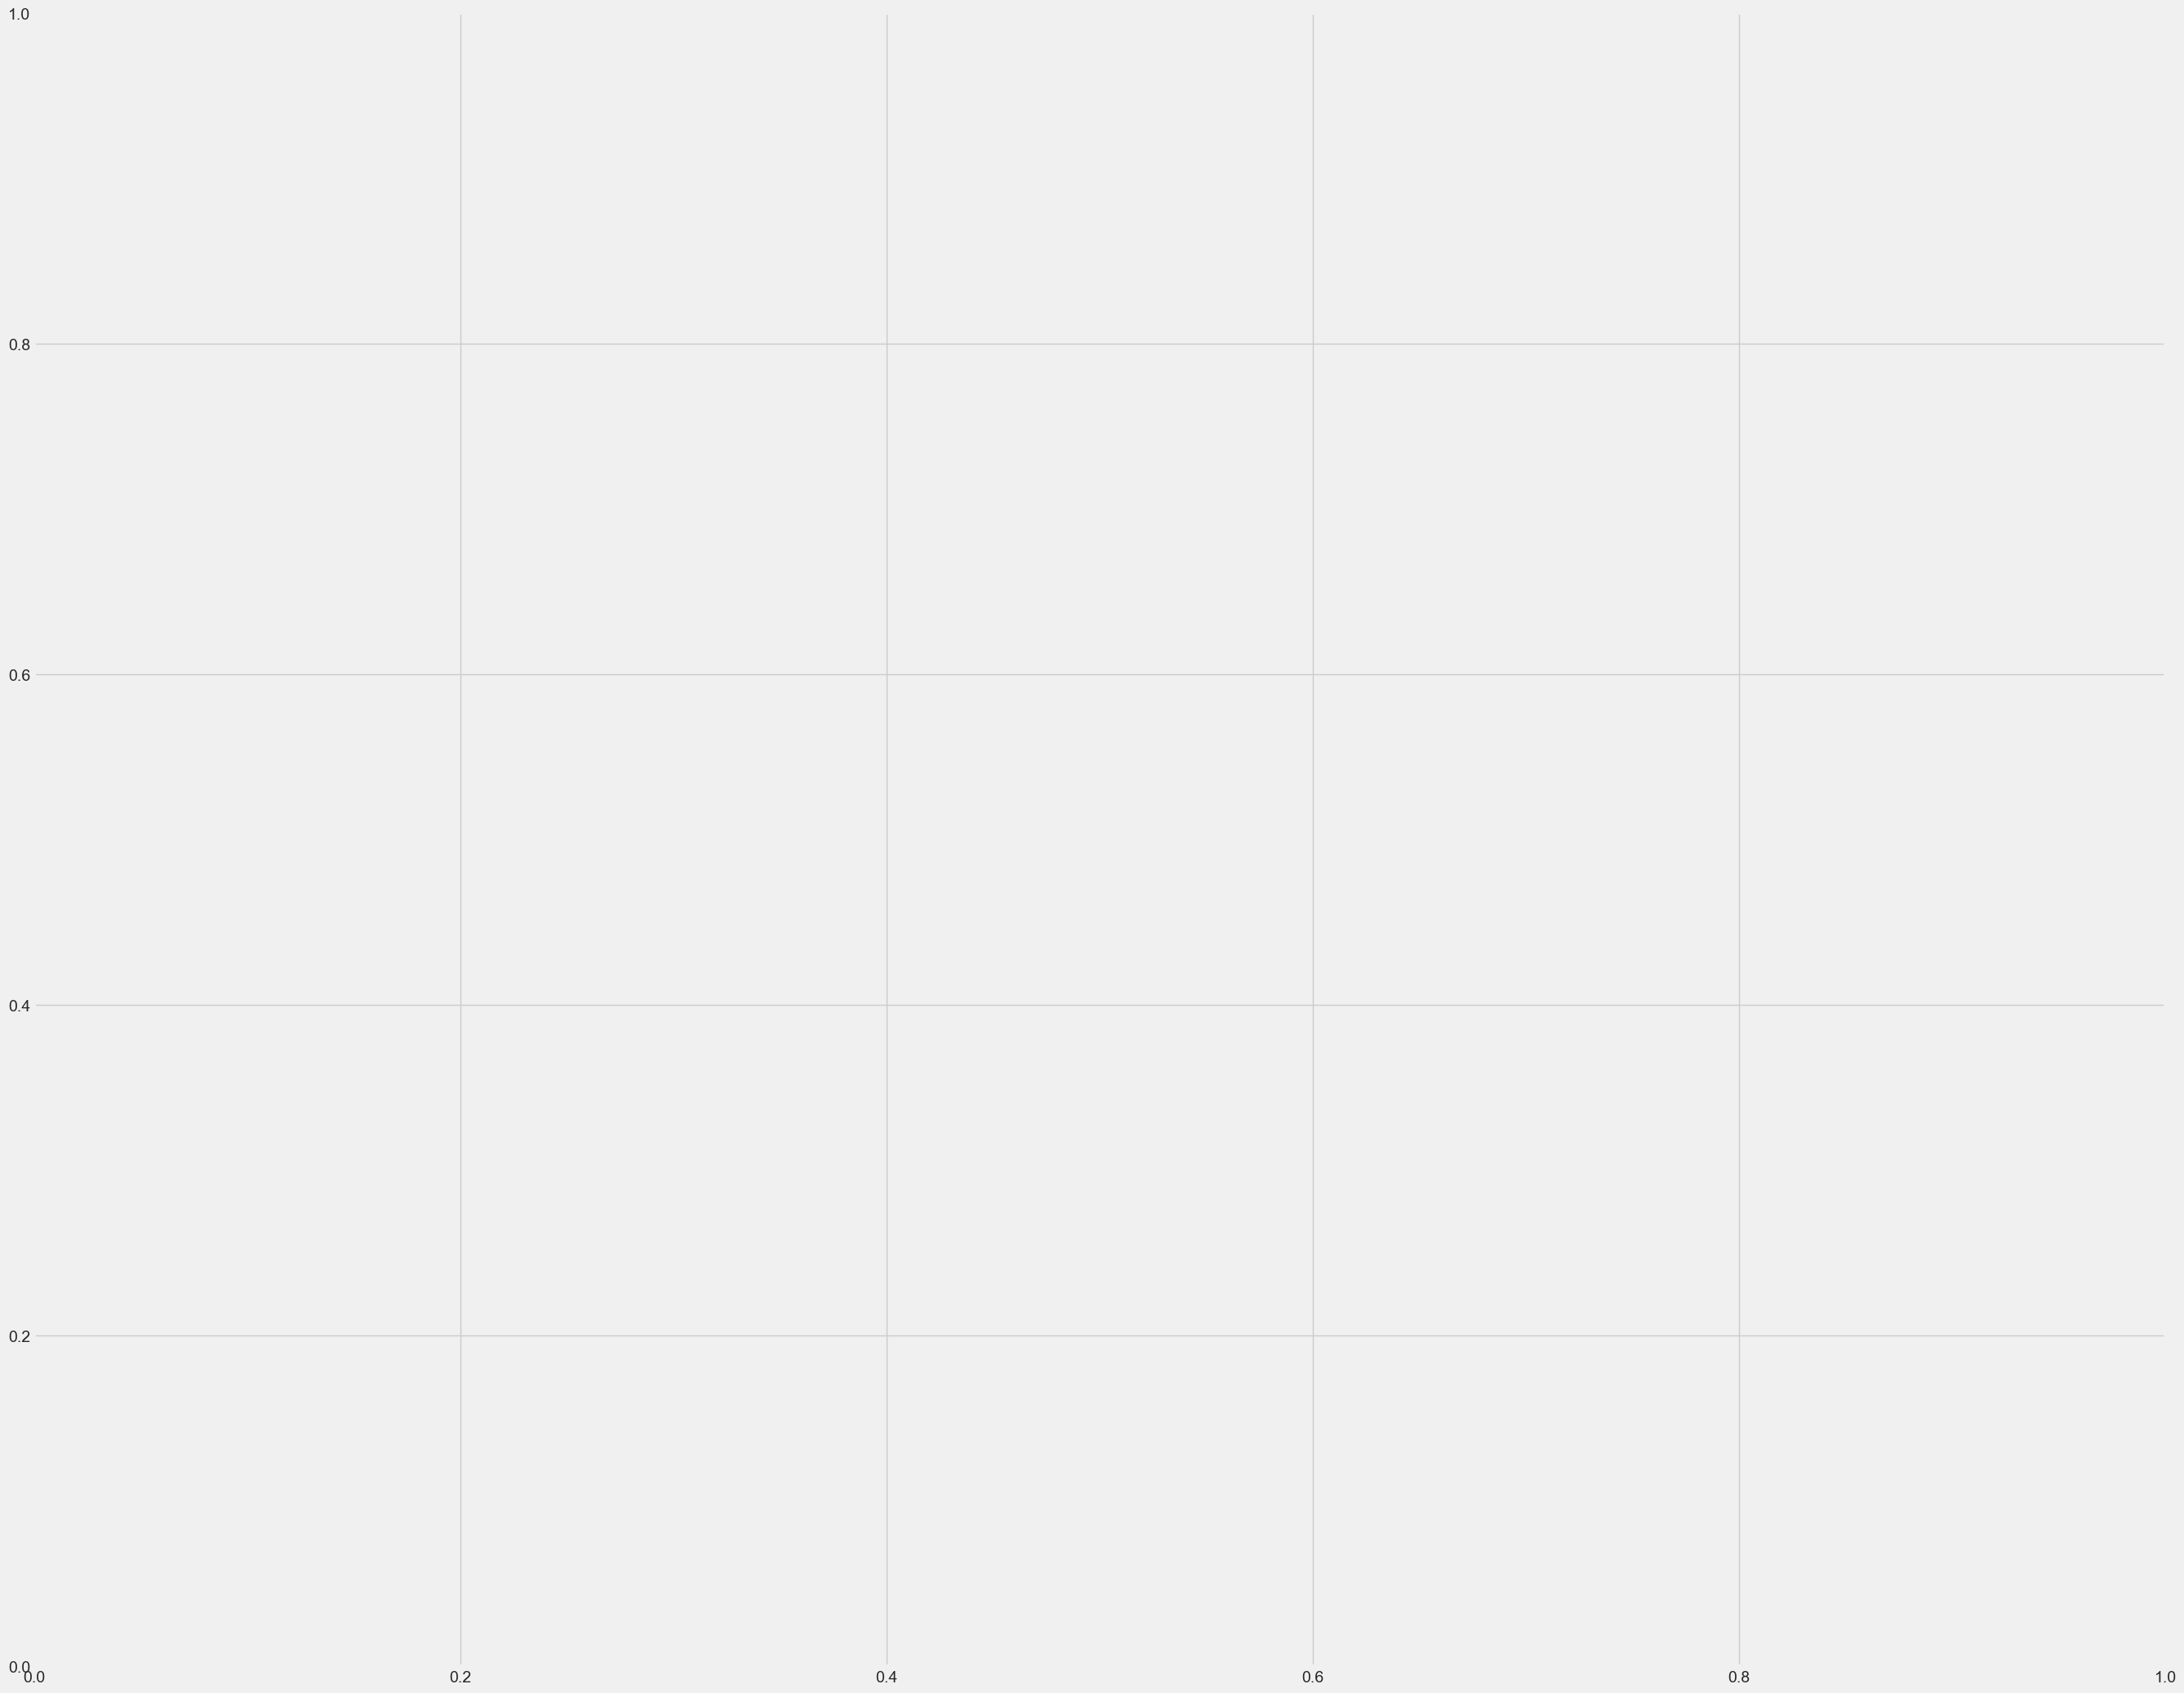

In [54]:
BI = ['WorkToolsFrequencyQlik', 'WorkToolsFrequencySAPBusinessObjects', 'WorkToolsFrequencyTableau',
      'WorkToolsFrequencyTIBCO', 'WorkToolsFrequencyAngoss', 'WorkToolsFrequencyIBMCognos',
      'WorkToolsFrequencyKNIMECommercial', 'WorkToolsFrequencyExcel']
plt.subplots(figsize=(30, 25))
length = len(BI)
for i, j in itertools.zip_longest(BI, range(length)):
    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.countplot(i, data=scientist)
    plt.title(i, size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

ValueError: could not convert string to float: 'Unnecessary'

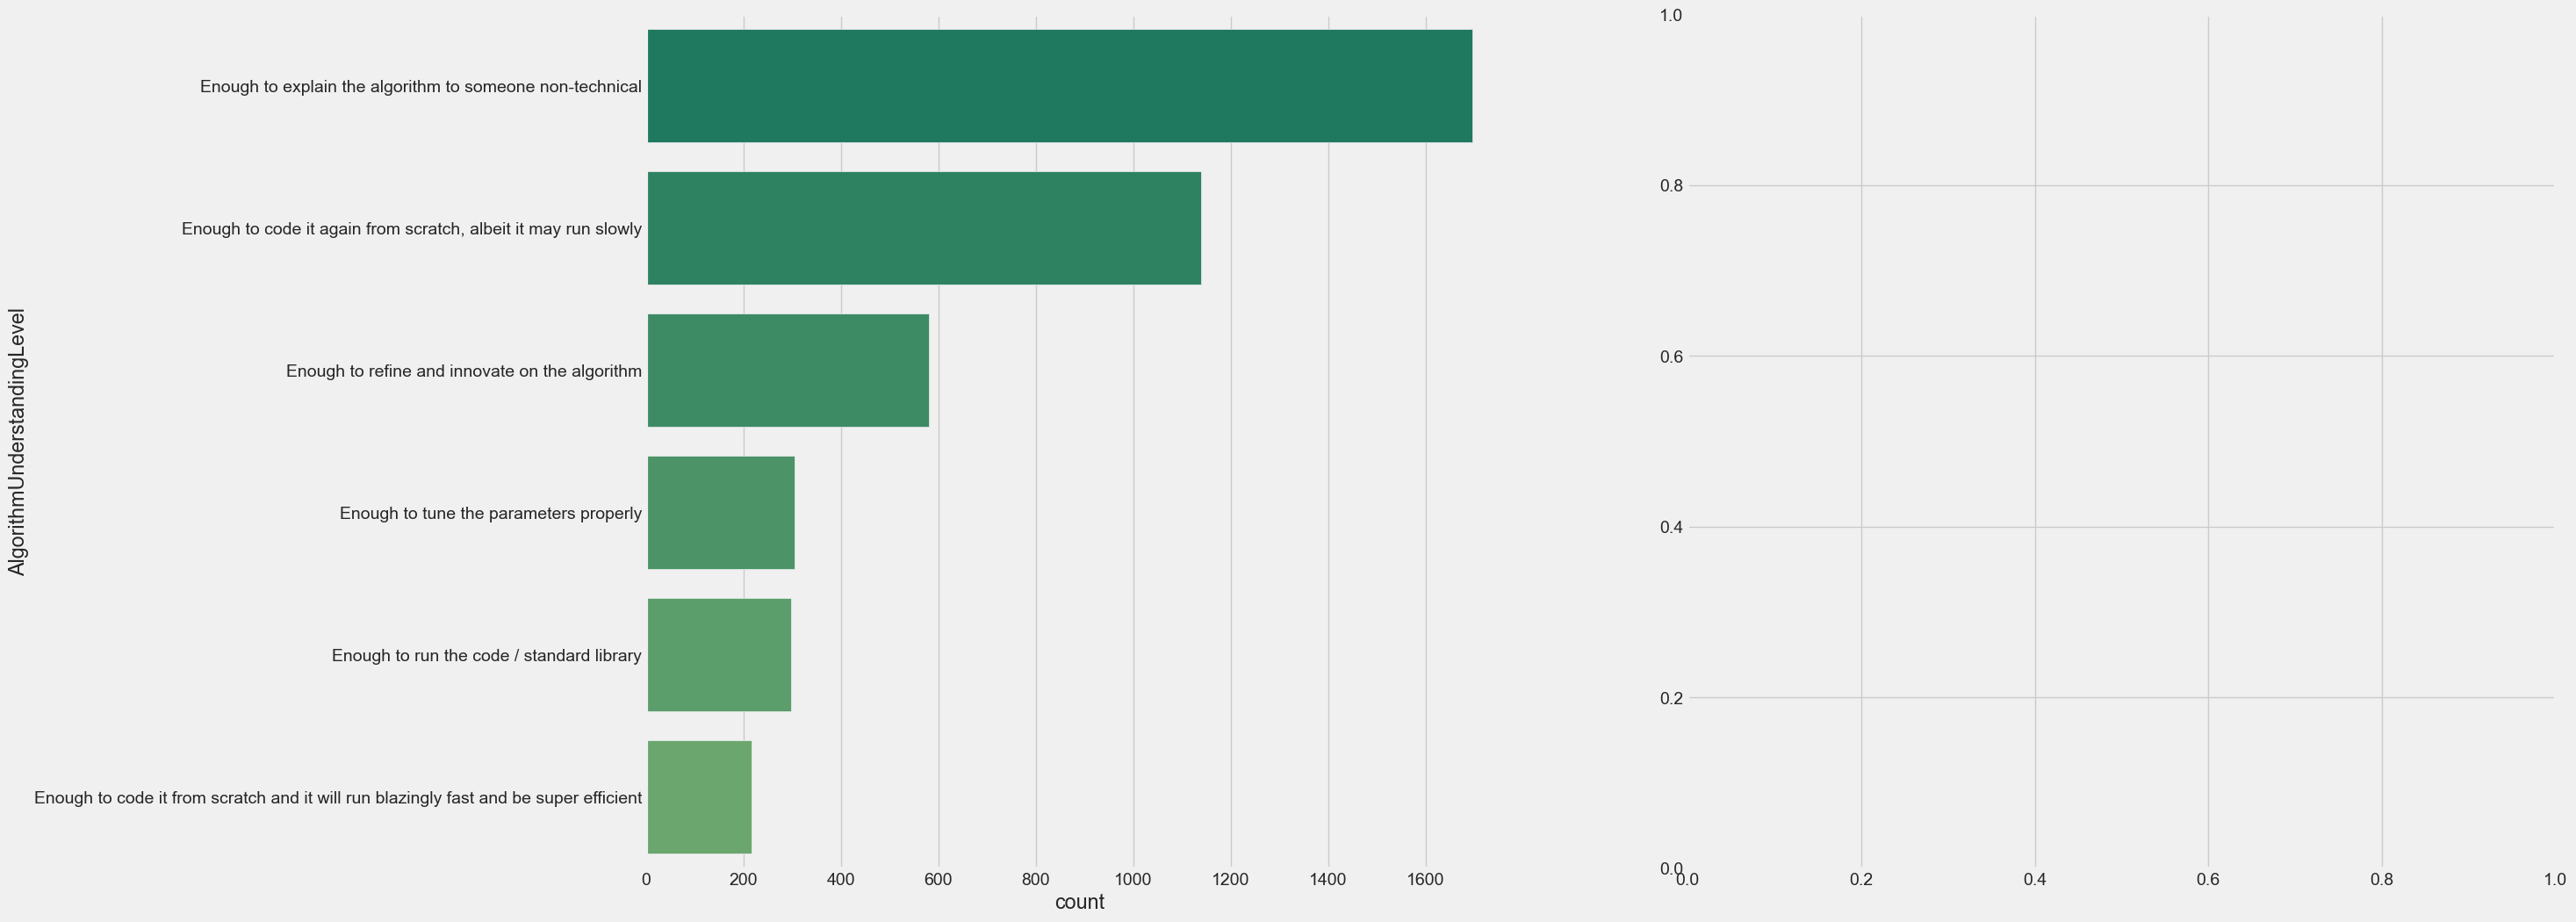

In [55]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],
              order=scientist['AlgorithmUnderstandingLevel'].value_counts().index, ax=ax[0],
              palette=sns.color_palette('summer', 15))
sns.countplot(scientist['JobSkillImportanceStats'], ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

ValueError: Number of rows must be a positive integer, not 4.0

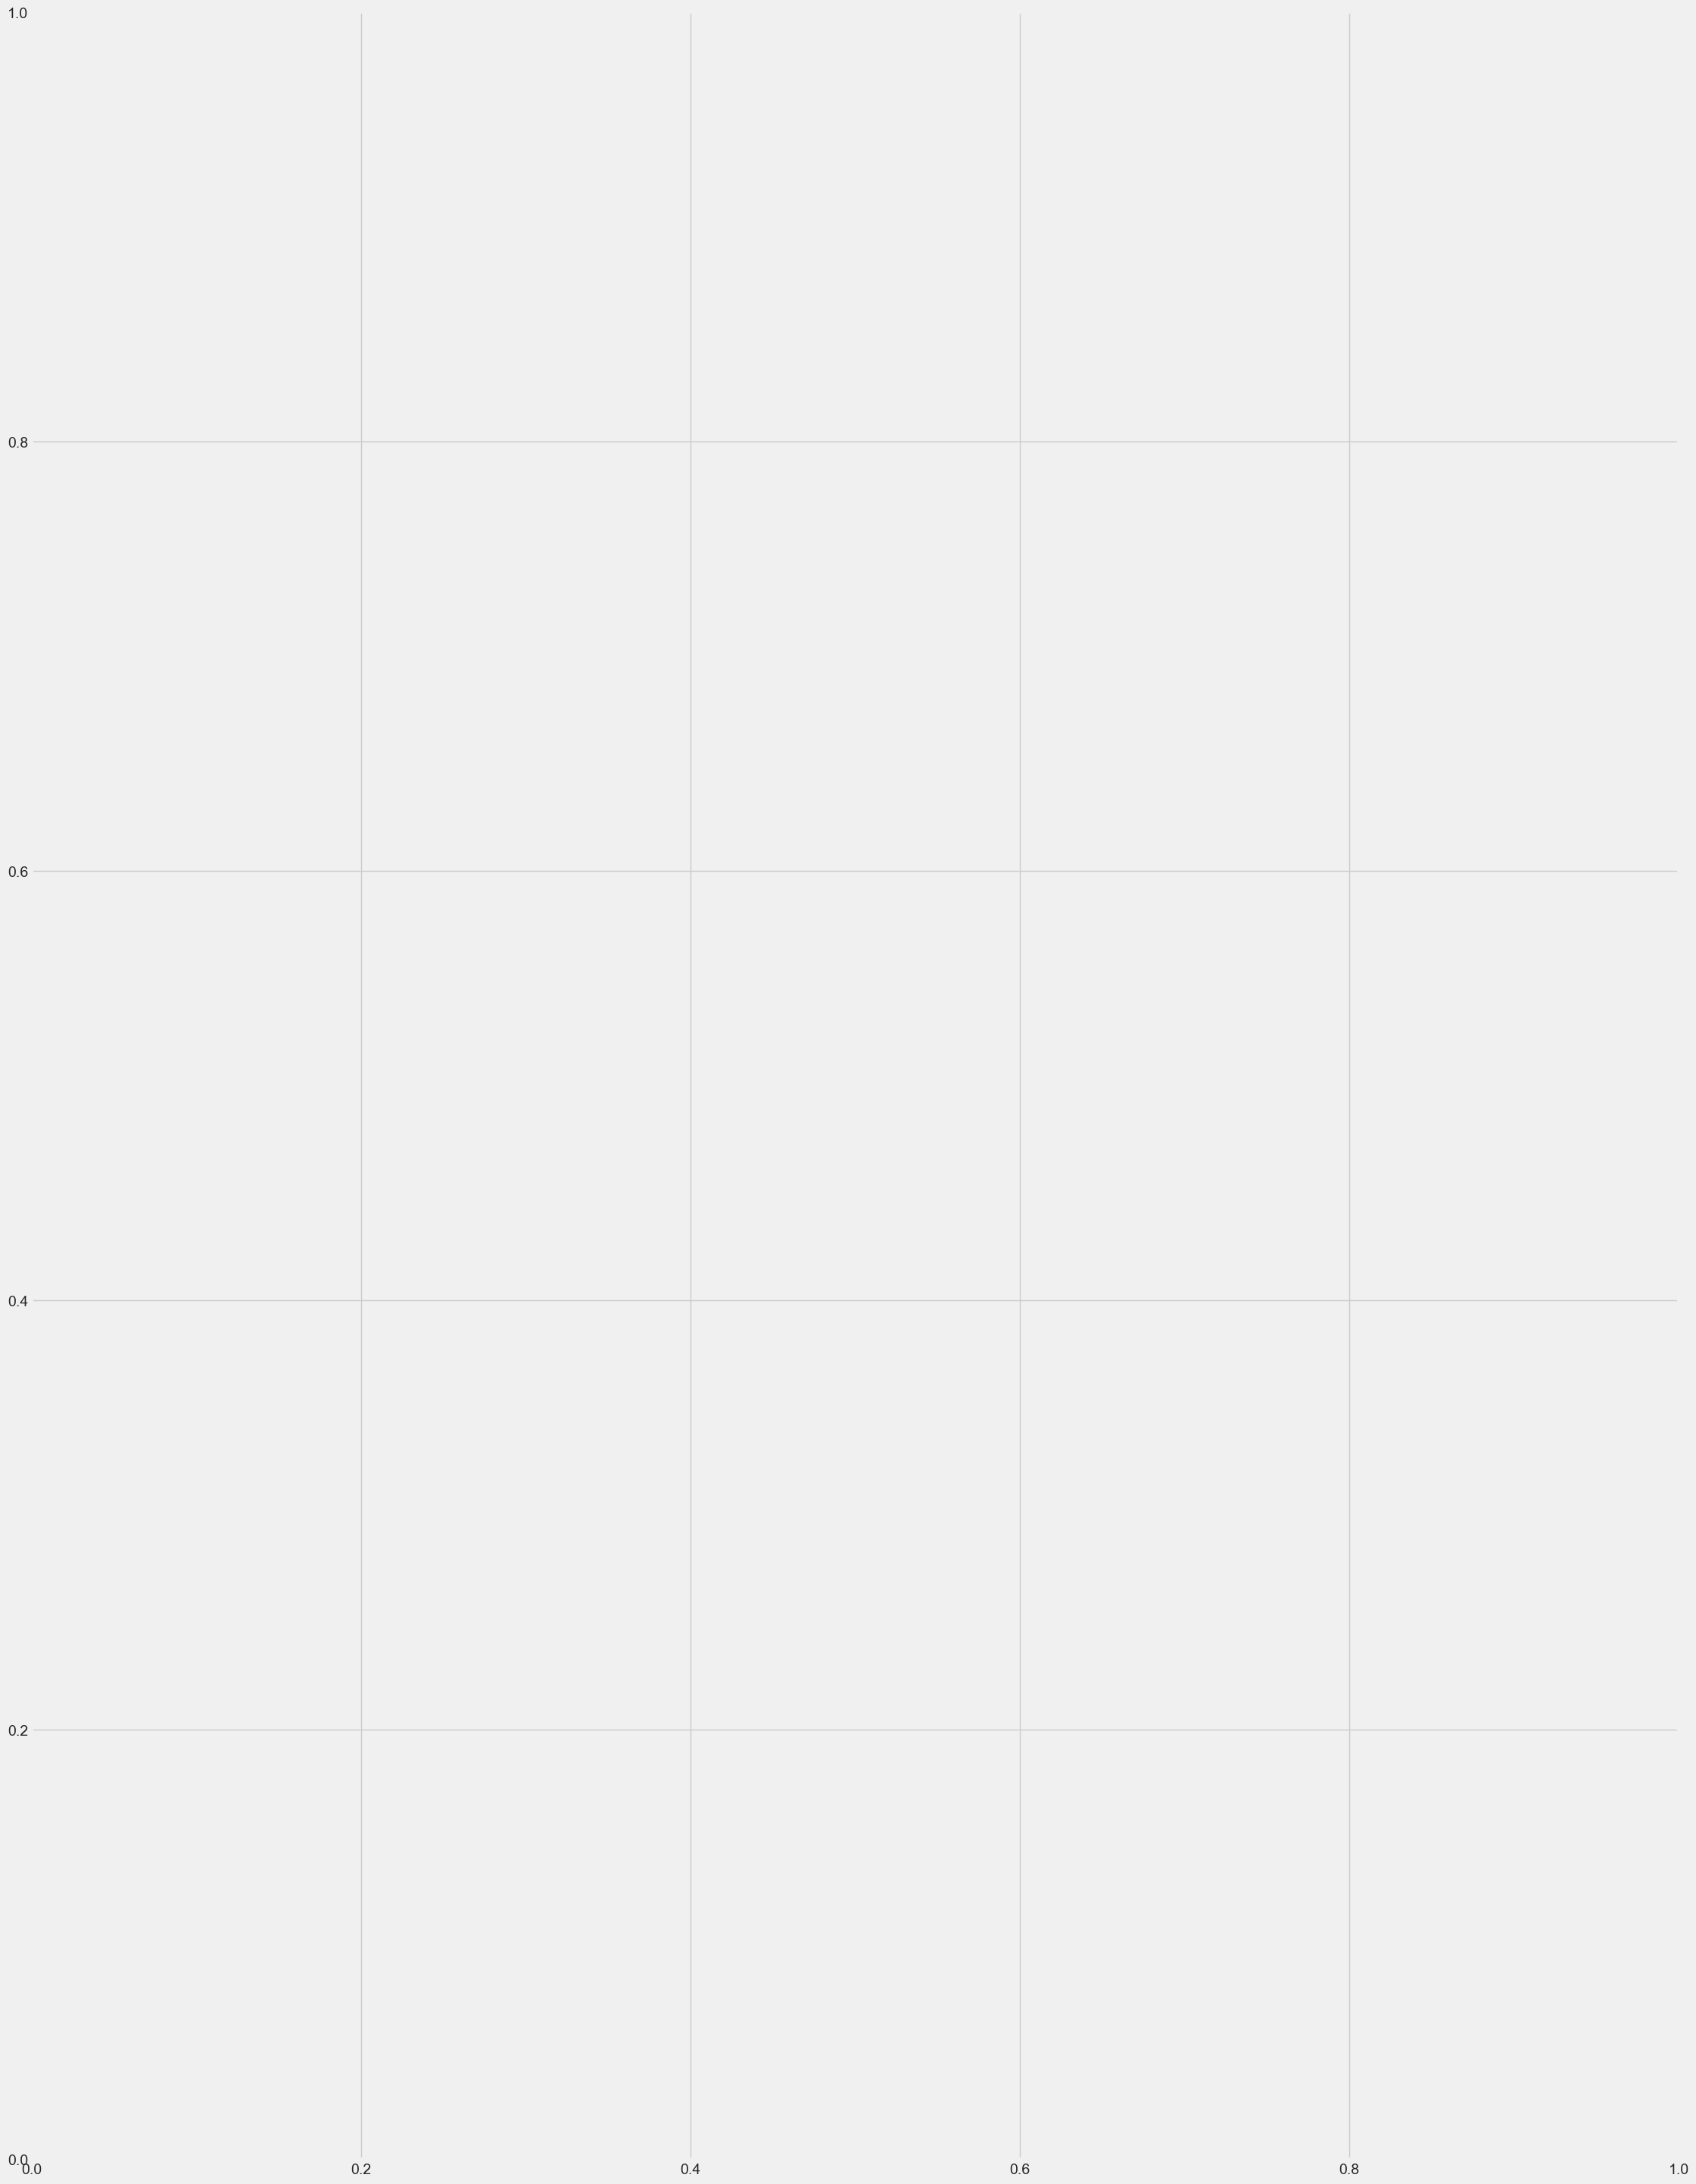

In [56]:
plt.subplots(figsize=(25, 35))
useful = ['LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege', 'LearningPlatformUsefulnessCompany',
          'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses', 'LearningPlatformUsefulnessProjects',
          'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessYouTube']
length = len(useful)
for i, j in itertools.zip_longest(useful, range(length)):
    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    scientist[i].value_counts().plot.pie(autopct='%1.1f%%', colors=['g', 'lightblue', 'r'],
                                         wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
    plt.title(i, size=25)
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

ValueError: could not convert string to float: 'Nice to have'

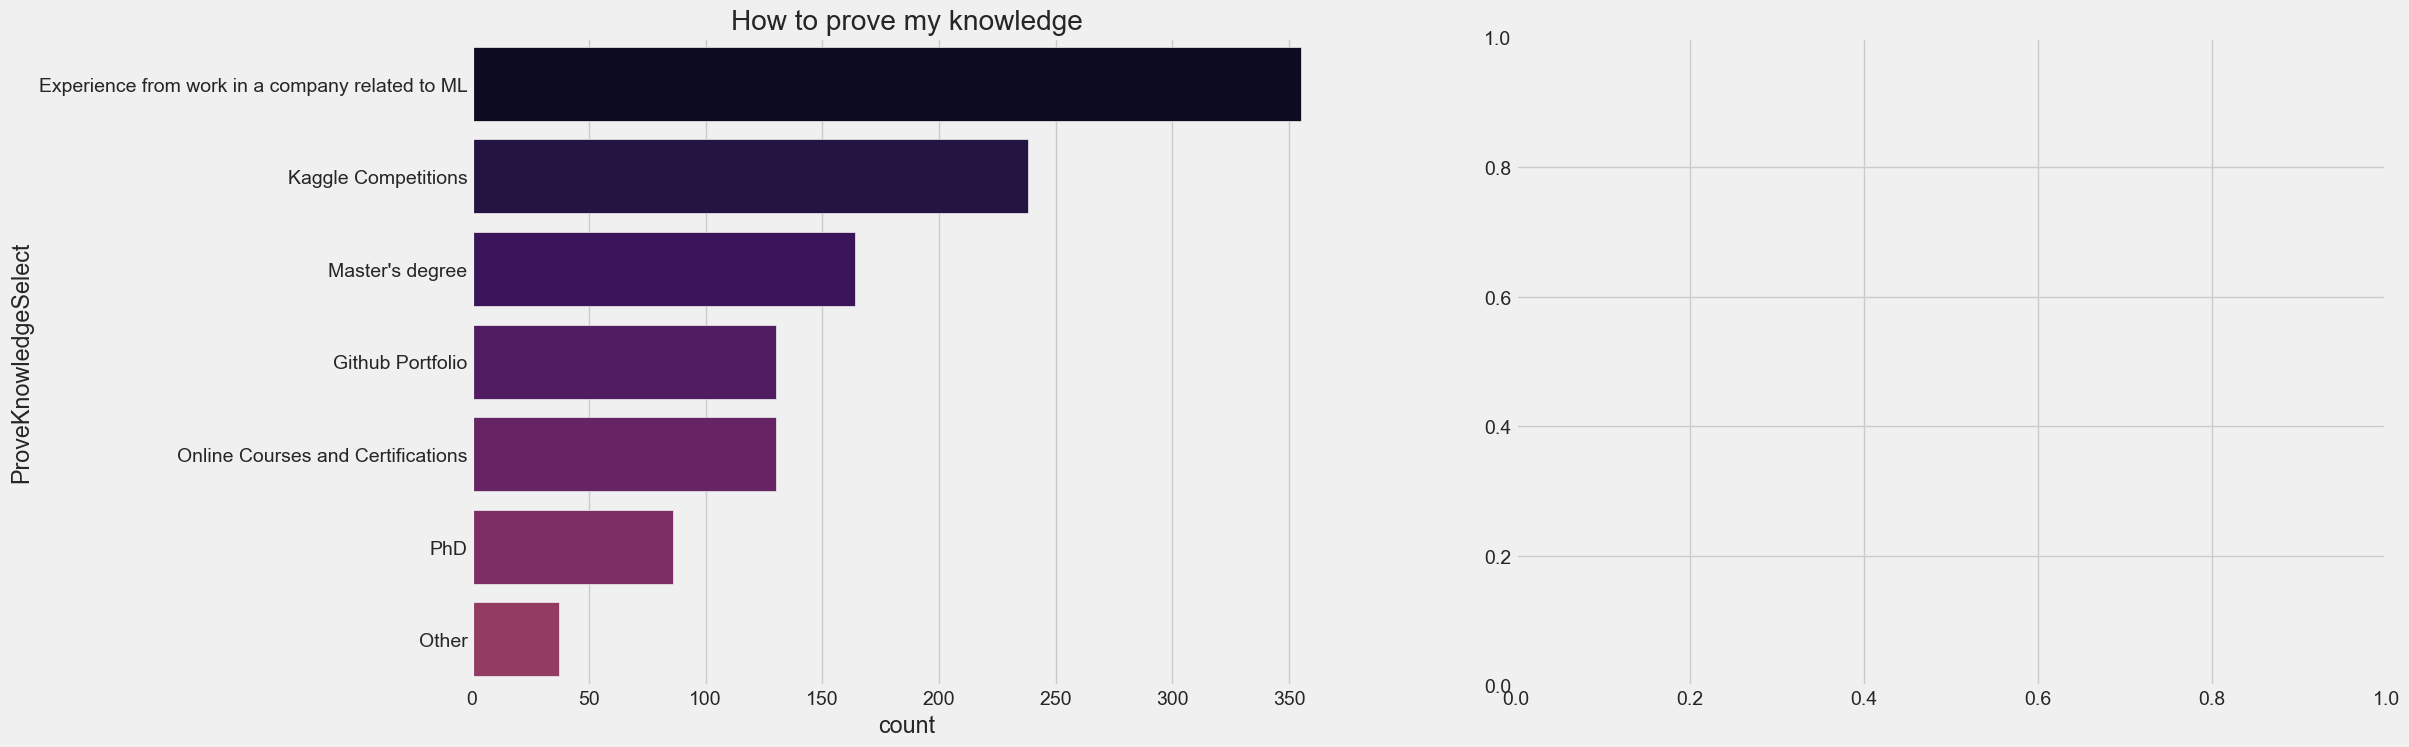

In [57]:
f, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.countplot(y=scientist['ProveKnowledgeSelect'], order=scientist['ProveKnowledgeSelect'].value_counts().index,
              ax=ax[0], palette=sns.color_palette('inferno', 15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'], ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

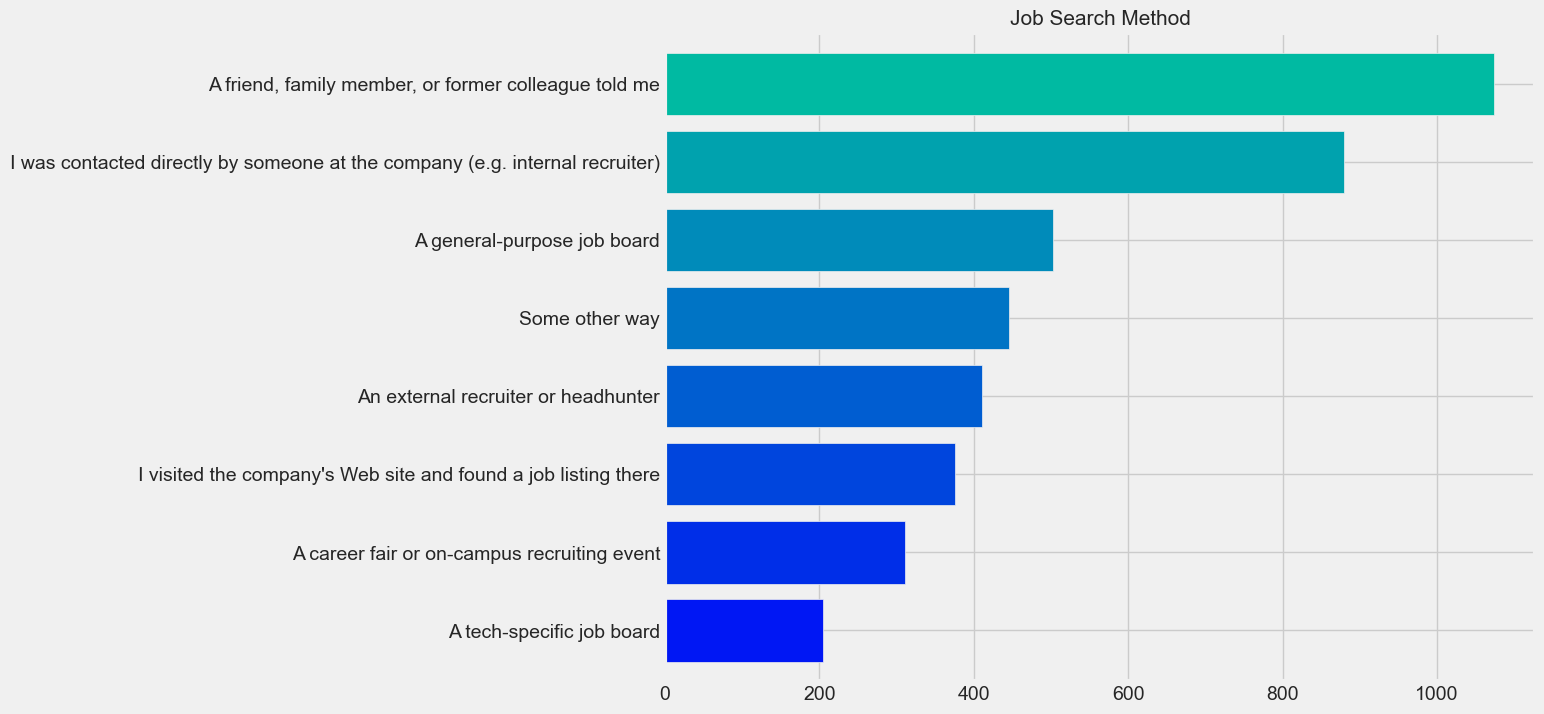

In [58]:
plt.subplots(figsize=(10, 8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,
                                                                                                 color=sns.color_palette(
                                                                                                     'winter', 10))
plt.title('Job Search Method', size=15)
plt.ylabel('')
plt.show()

In [59]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

free = pd.read_csv('../data/kaggle/freeformResponses.csv')
stop_words = set(stopwords.words('english'))
stop_words.update(',', ';', '!', '?', '.', '(', ')', '$', '#', '+', ':', '...')

In [60]:
motivation = free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate = []
for i in motivation:
    motivate.extend(i)
motivate = pd.Series(motivate)
motivate = ([i for i in motivate.str.lower() if i not in stop_words])
f1 = open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle, 'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size=60, width=1000, height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

NameError: name 'kaggle' is not defined

In [61]:
library = free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib = []
for i in library:
    lib.extend(i)
lib = pd.Series(lib)
lib = ([i for i in lib.str.lower() if i not in stop_words])
lib = pd.Series(lib)
lib = lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'), 'index'] = 'Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'), 'index'] = 'Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'), 'index'] = 'Sklearn'
lib = lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages = ['dplyr', 'tidyr', 'ggplot2', 'caret', 'randomforest', 'shiny', 'R markdown', 'ggmap', 'leaflet', 'ggvis',
              'stringr', 'tidyverse', 'plotly']
Py_packages = ['Pandas', 'Tensorflow', 'Sklearn', 'matplotlib', 'numpy', 'scipy', 'seaborn', 'keras', 'xgboost', 'nltk',
               'plotly']
f, ax = plt.subplots(1, 2, figsize=(18, 10))
lib[lib.index.isin(Py_packages)].sort_values(by=0, ascending=True).plot.barh(ax=ax[0], width=0.9,
                                                                             color=sns.color_palette('viridis', 15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0, ascending=True).plot.barh(ax=ax[1], width=0.9,
                                                                            color=sns.color_palette('viridis', 15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

KeyError: 'Column not found: 0'